# Business Case Problem Definition

* The dataset provided contains various health-related metrics for patients undergoing cardiac evaluation. The key objective is to predict the presence of heart disease based on these metrics, which include exercise test results, demographic information, and clinical measurements. Accurate prediction can lead to timely diagnosis and treatment, ultimately improving patient outcomes.

**Importing necessary libraries**

In [1]:
import pandas as pd  # importing pandas for analyzing, cleaning, exploring, and manipulating data
import numpy as np # for numrical and statistical calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import warnings # for the warnings
warnings.filterwarnings('ignore') # use for ignore the warning

In [2]:
data_labels = pd.read_csv("labels.csv") # Load the label csv file
data_values = pd.read_csv("values.csv") # load the values csv file
data = pd.concat([data_values,data_labels.drop(["patient_id"],axis=1)], axis=1) # Concatenate the DataFrames column-wise and drop the duplicate column

## Data Understanding
* **Explore the Data:**
  * Check the data types of each column.
  * Understand the categorical and numerical features.
  * Identify missing values or inconsistencies.

### **Basic check**

In [3]:
data.head() # See the data top rows

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [4]:
 data.tail() # See the data last rows

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [5]:
data.info() # Check the data types of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

* **Insights**
  * There are total 15 columns in data and maximum columns has int datatype
  * There is 180 rows and 15 columns

### Column Explanations
* **patient_id:** A unique identifier for each patient in the dataset. This can be used to track patient records but does not provide health information.

* **slope_of_peak_exercise_st_segment:** Indicates the slope of the ST segment during peak exercise. It typically has values like:

  * 0: Downsloping
  * 1: Flat
  * 2: Upsloping This variable helps assess the heart's response to exercise.

* **thal:** Represents the thalassemia status of the patient. Possible values are:

  * 1: Normal
  * 2: Fixed defect
  * 3: Reversible defect This feature provides insight into the presence of blood flow abnormalities.
  * resting_blood_pressure: The resting blood pressure of the patient measured in mm Hg. This is an important cardiovascular risk factor.

* **chest_pain_type:** Categorical variable indicating the type of chest pain experienced:

  * 1: Typical angina
  * 2: Atypical angina
  * 3: Non-anginal pain
  * 4: Asymptomatic Different types of chest pain can indicate varying levels of heart disease risk.

* **num_major_vessels:** The number of major blood vessels (0-3) colored by fluoroscopy. This is a measure of the extent of coronary artery disease.

* **fasting_blood_sugar_gt_120_mg_per_dl:** A binary indicator (0 or 1) showing whether the patient's fasting blood sugar level is greater than 120 mg/dL. This can indicate diabetes, which is a risk factor for heart disease.

* **resting_ekg_results:** Results of a resting electrocardiogram (EKG), typically coded as:

  * 0: Normal
  * 1: Having ST-T wave abnormality
  * 2: Showing probable or definite left ventricular hypertrophy This provides insight into the electrical activity of the heart.

* **serum_cholesterol_mg_per_dl:** The serum cholesterol level in mg/dL. High cholesterol is a significant risk factor for heart disease.

* **oldpeak_eq_st_depression:** Indicates the ST depression induced by exercise relative to rest. It is measured in mm and is used to assess ischemia.

* **sex:** Gender of the patient, typically encoded as:

  * 0: Female
  * 1: Male

* **age:** The age of the patient in years. Age is a critical risk factor for heart disease.

* **max_heart_rate_achieved:** The maximum heart rate achieved during the exercise test. Higher heart rates during exercise are generally indicative of better cardiovascular fitness.

* **exercise_induced_angina:** A binary indicator (0 or 1) showing whether the patient experienced angina during exercise.

* **heart_disease_present:** The target variable indicating the presence (1) or absence (0) of heart disease. This is the main outcome the model aims to predict.

In [6]:
data.isnull().sum() # Identify missing values or inconsistencies.

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

* **Insights**
  * There are no null values in column

In [7]:
data.describe() # Here we can can see the statistical information of numerical columns

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


**Insights**

**Slope of Peak Exercise ST Segment:**

  * Mean: 1.55, with a maximum value of 3. This suggests that the majority of patients exhibit either a flat or upsloping ST segment during peak exercise, which may indicate varying levels of ischemia.

* **Resting Blood Pressure:**

  * Mean: 131.31 mm Hg, which is within the prehypertensive range (120-139 mm Hg) according to standard classifications.
Range: From 94 mm Hg to 180 mm Hg, indicating some patients have significantly elevated blood pressure, which is a risk factor for heart disease.

* **Chest Pain Type:**

  * Mean: 3.16, with the minimum being 1 (typical angina) and the maximum being 4 (asymptomatic). The average suggests a mix of angina types, with a possible prevalence of atypical and non-anginal pain.

* **Number of Major Vessels:**

  * Mean: 0.69, with a maximum of 3. This indicates that on average, patients have less than one major vessel affected, but some patients show more significant coronary artery involvement.

* **Fasting Blood Sugar > 120 mg/dL:**

  * Mean: 0.16 (indicating that about 16% of patients have elevated fasting blood sugar). This could suggest a low prevalence of diabetes among the cohort, which is a risk factor for cardiovascular disease.

* **Resting EKG Results:**

  * Mean: 1.05, indicating that many patients have normal resting EKG results (0) or minor abnormalities (1). The maximum value of 2 suggests some patients show signs of left ventricular hypertrophy.

* **Serum Cholesterol:**

  * Mean: 249.21 mg/dL, which is above the optimal level (<200 mg/dL) and indicates a potential risk factor for heart disease. The maximum level of 564 mg/dL is particularly concerning.

* **Oldpeak (ST Depression):**

  * Mean: 1.01, with a maximum of 6.2. This suggests that, on average, patients experience mild ST depression, which can indicate ischemia, particularly during exercise.

* **Sex:**

  * Mean: 0.69, indicating a higher proportion of male patients (1) compared to female patients (0).

* **Age:**

  * Mean: 54.81 years, which suggests the sample is predominantly middle-aged. Age is a known risk factor for heart disease.

* **Max Heart Rate Achieved:**

  * Mean: 149.48 bpm, with a maximum of 202 bpm. While most patients reach healthy heart rates during exercise, the wide range indicates varying fitness levels.

* **Exercise-Induced Angina:**

  * Mean: 0.32, indicating that about 32% of patients experience angina during exercise, which is significant in assessing the severity of coronary artery disease.

* **Heart Disease Present:**

  * Mean: 0.44, suggesting that 44% of the patients in this dataset have heart disease. This highlights a substantial prevalence within the cohort.

**Summary**

  **The dataset reveals critical insights into the cardiovascular health of the patients studied. Key risk factors such as elevated cholesterol, resting blood pressure, and a notable prevalence of heart disease suggest a need for further investigation and potential intervention. The data can guide healthcare professionals in tailoring treatment plans and prioritizing patients based on their risk profiles.**

In [8]:
data.describe(include="O") # Here we can can see the statistical information of categorical columns

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


**Insights**
* **Patient ID:**

  * Count: There are 180 unique patient IDs, which indicates that each entry in the dataset corresponds to a distinct patient. This ensures that there is no duplication in patient records, allowing for accurate individual analysis.

* **Thal (Thalassemia Status):**

  * Unique Values: The thal column contains 3 unique values, indicating that there are three different categories of thalassemia status represented in the dataset:
  * Normal
  * Fixed defect
  * Reversible defect

  * Most Common Value: The most frequent value is "normal," which appears 98 times. This suggests that a significant portion of the patients in this dataset does not exhibit any thalassemia-related issues.

* Frequency Distribution:

  * With 98 patients classified as "normal," the remaining patients would be distributed among the other categories, likely indicating that thalassemia is not a prevalent condition in this cohort.
  * Given that only three unique categories exist for thal, it’s important to evaluate how these categories correlate with other health metrics, particularly heart disease presence.

**Summary**

**The data reveals that each patient is uniquely represented, and most patients do not have thalassemia-related issues, as indicated by the predominance of the "normal" category. This information can be useful for understanding the demographic composition of the cohort and for analyzing how thalassemia status interacts with other cardiovascular risk factors and health outcomes. Further investigation could focus on the patients with fixed or reversible defects to assess their cardiovascular health more closely.**

## Data Exploration and Cleaning

* **Objective:** Understand the dataset and identify any missing or inconsistent values.

* **Actions:**
  * Perform exploratory data analysis (EDA) to summarize the main characteristics of the dataset.
  * Identify and handle missing values using techniques such as imputation or removal.
  * Convert categorical variables (e.g., thal, chest pain type) into numerical representations if necessary.

### Exploratory Data Analysis (EDA)
#### **Univariate Analysis:**
  * Visualize distributions of features.

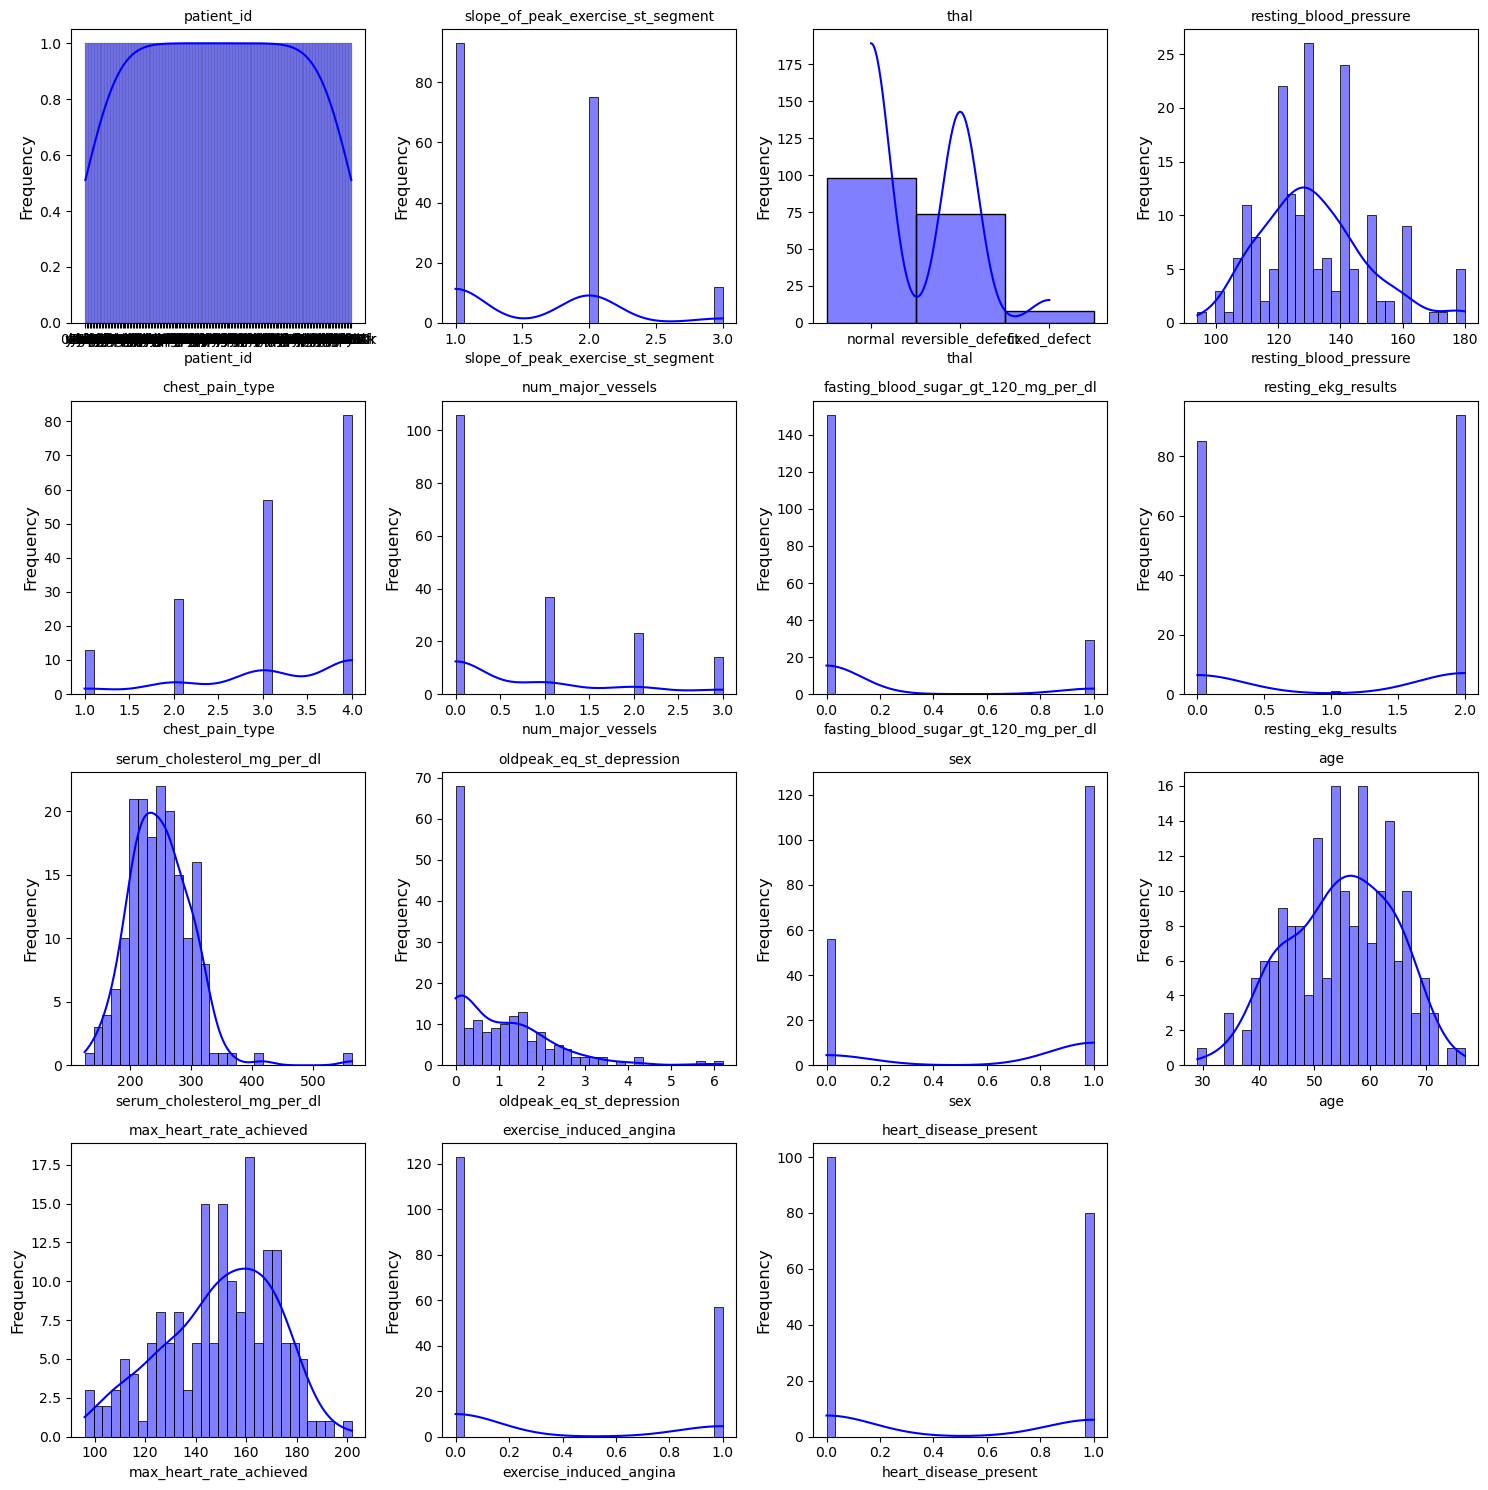

In [9]:
plt.figure(figsize=(15, 15))  # figure size

# Set the number of features and determine the layout
num_features = len(data.columns) # calculate the number of columns
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for plot_num, feature in enumerate(data.columns, start=1):
    plt.subplot(num_rows, num_cols, plot_num) # here we set the sub plot 
    sns.histplot(data[feature], kde=True, bins=30, color='blue')  # Using sns.histplot with kde
    plt.title(feature, fontsize=10) # set the size of title
    plt.ylabel('Frequency', fontsize=12) # set the size of y

# Show all plots at once
plt.tight_layout()  # This helps in adjusting subplots to fit into the figure area.
plt.show()

**Insights**

* **Patient ID:** The distribution appears uniform, suggesting no particular pattern in the patient IDs.
* **Slope of Peak Exercise ST Segment:** The distribution is heavily skewed to the right, with a concentration of values around 0. This indicates that most patients have a relatively flat ST segment during peak exercise.
* **Thal:** The distribution is multimodal, suggesting distinct groups or categories within the data. The peaks around "normal" and "fixed defect" might represent different heart conditions.
* **Resting Blood Pressure:** The distribution is approximately normal, with a slight skew to the right. This indicates that most patients have resting blood pressure within a typical range, with some having slightly higher values.
Chest Pain Type: The distribution is skewed to the right, with a concentration of values around 2. This suggests that the most common type of chest pain is likely the second category (possibly angina).
* **Num Major Vessels:** The distribution is skewed to the left, with a concentration of values around 0. This indicates that most patients have few or no major vessels blocked.
* **Fasting Blood Sugar GT 120 mg/dL:** The distribution is skewed to the right, with a concentration of values around 0. This suggests that most patients have fasting blood sugar levels below 120 mg/dL.
* **Resting EKG Results:** The distribution is skewed to the right, with a concentration of values around 0. This indicates that most patients have normal resting EKG results.
* **Serum Cholesterol:** The distribution is skewed to the right, with a concentration of values around 200. This suggests that most patients have cholesterol levels within a normal range, with some having higher levels.
* **Oldpeak EQ ST Depression:** The distribution is skewed to the right, with a concentration of values around 0. This indicates that most patients have a relatively flat ST segment during exercise.
* **Sex:** The distribution is bimodal, suggesting two distinct groups (likely male and female).
* **Age:** The distribution is skewed to the right, with a concentration of values around 50. This indicates that the sample is predominantly composed of middle-aged individuals.
* **Max Heart Rate Achieved:** The distribution is skewed to the left, with a concentration of values around 175. This suggests that most patients are able to achieve a relatively high heart rate during exercise.
* **Exercise Induced Angina:** The distribution is skewed to the right, with a concentration of values around 0. This indicates that most patients do not experience angina during exercise.
* **Heart Disease Present:** The distribution is skewed to the right, with a concentration of values around 0. This suggests that most patients do not have heart disease.

#### **Bivariate Analysis:**
  * Explore relationships between features and the target variable.
  * Use visualizations to check for patterns.

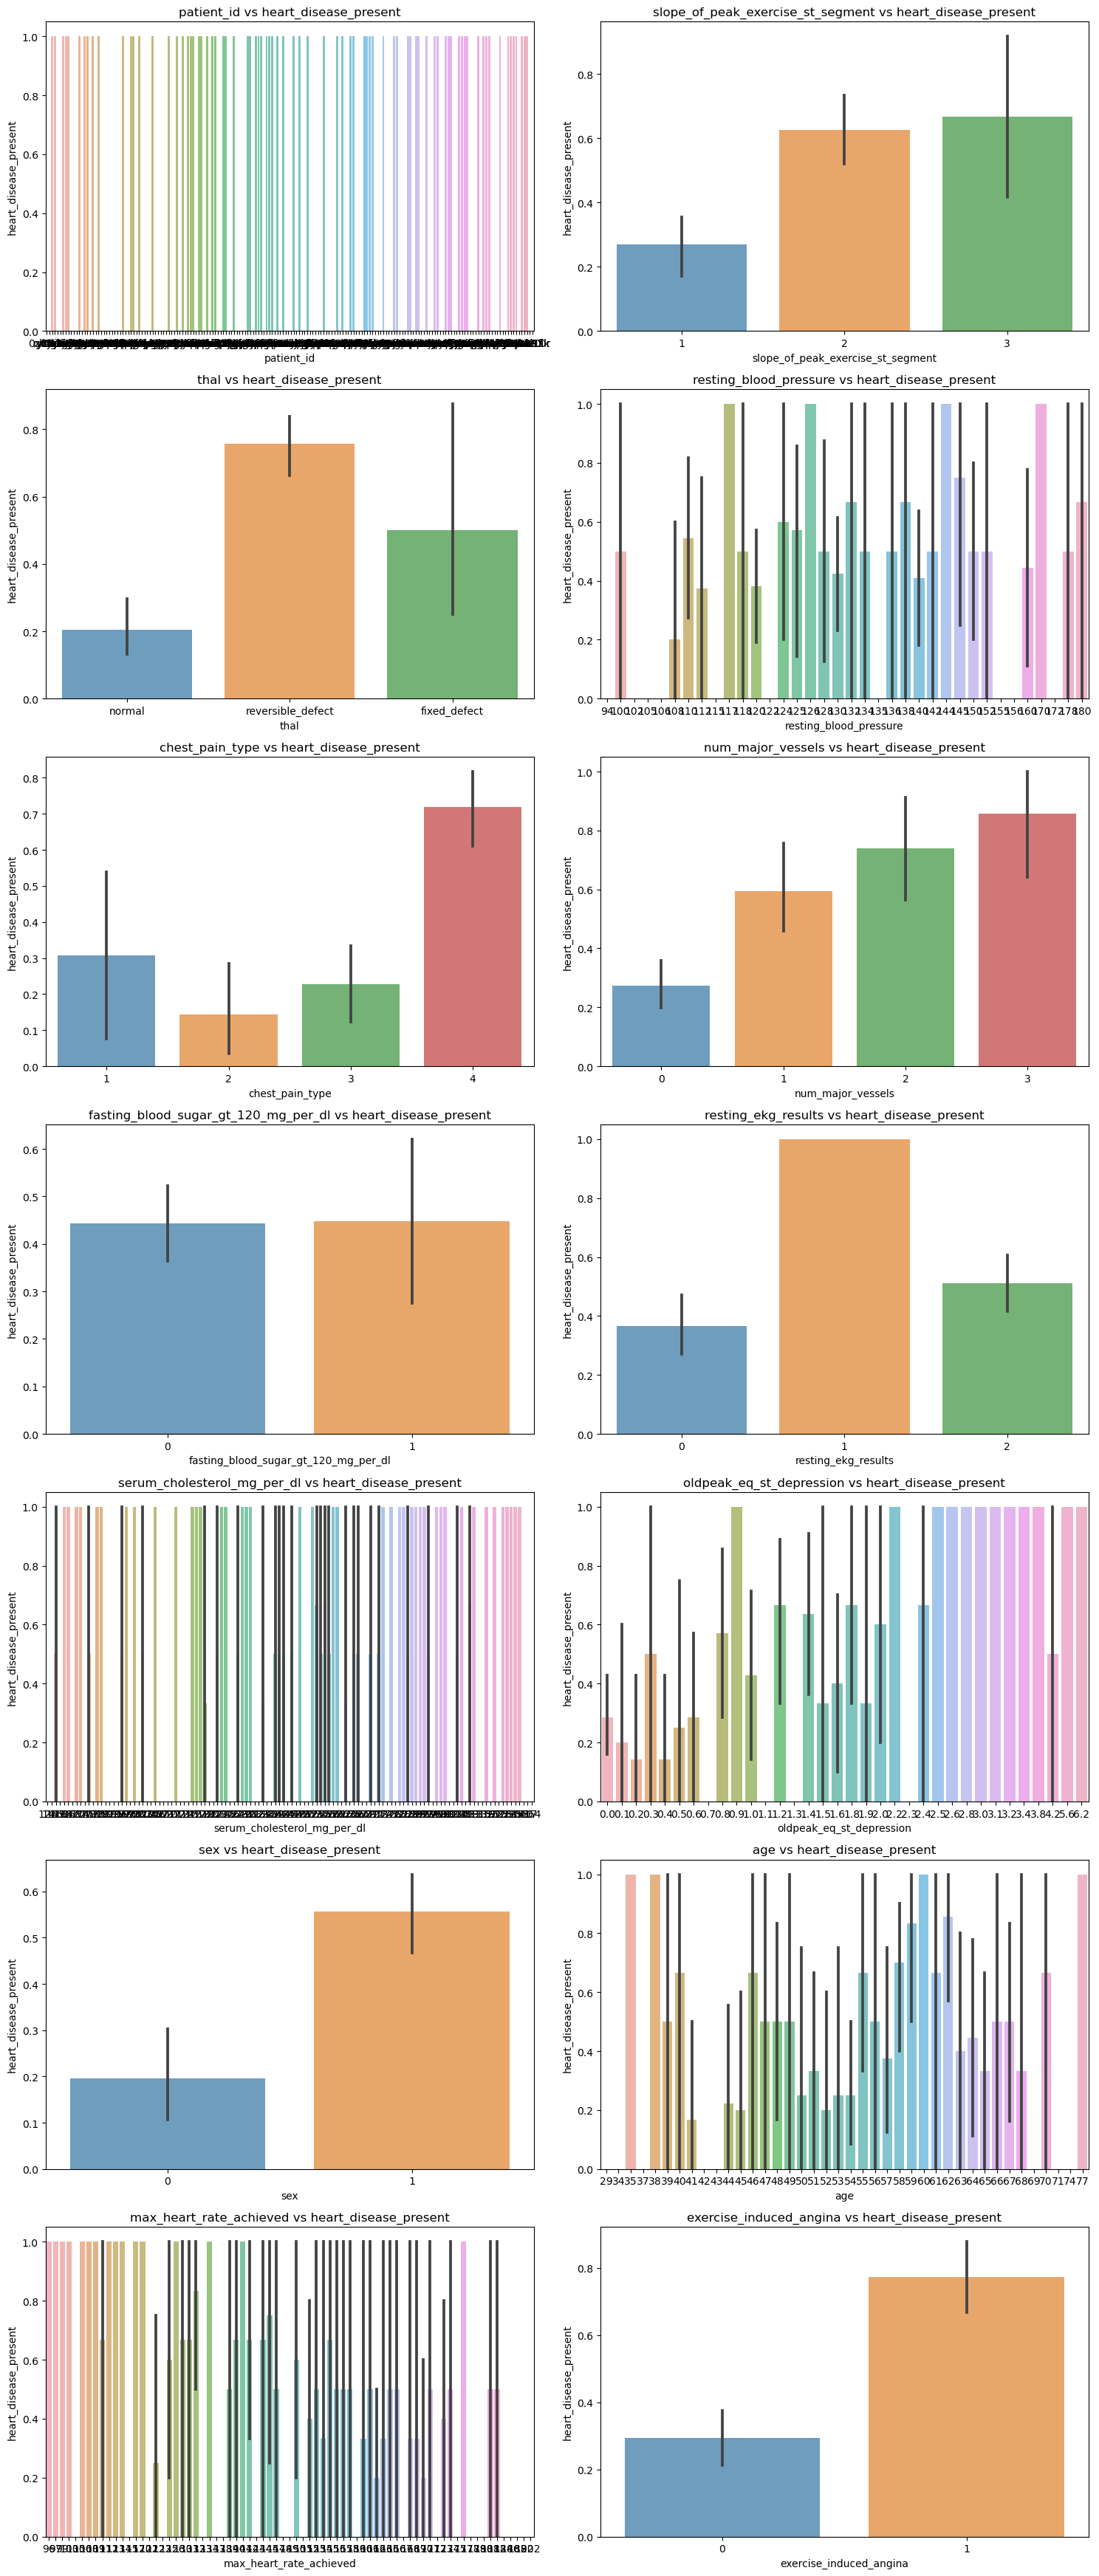

In [10]:
# Specify the target variable as a string
target_variable = 'heart_disease_present'  # Use the name of the target variable as a string
features_x = data.drop(columns=[target_variable])  # Drop the target variable

# Get the list of features excluding the target variable
features = features_x.columns.tolist()  # List of feature names

plt.figure(figsize=(15, 35))  # Increase height for better visibility

# Set the number of features and determine the layout
num_features = len(features)
num_cols = 2  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for plot_num, feature in enumerate(features, start=1):
    plt.subplot(num_rows, num_cols, plot_num)
    sns.barplot(data=data, x=feature, y=target_variable, alpha=0.7)#, color='blue'
    plt.title(f'{feature} vs {target_variable}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel(target_variable, fontsize=10)

# Show all plots at once
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

**Insights:**

* **Patient ID:** There is no apparent pattern between patient ID and heart disease presence. The mean proportion of heart disease is relatively constant across different patient IDs.
* **Slope of Peak Exercise ST Segment:** The mean proportion of heart disease is higher for patients with a slope of 2 compared to those with slopes of 1 or 3. This suggests that a slope of 2 might be associated with a higher risk of heart disease.
* **Thal:** The mean proportion of heart disease is highest for patients with a "fixed defect" in thal, followed by "reversible defect" and "normal." This indicates that patients with fixed defects might be at higher risk for heart disease.
* **Resting Blood Pressure:** There is some variation in the mean proportion of heart disease across different resting blood pressure values. However, the differences are not as pronounced as in the other variables.
* **Chest Pain Type:** The mean proportion of heart disease is highest for patients with chest pain type 4, followed by types 2 and 3. Patients with chest pain type 1 have the lowest mean proportion of heart disease.
* **Num Major Vessels:** As the number of major vessels increases, the mean proportion of heart disease also tends to increase. Patients with 3 or more blocked vessels have the highest risk.
* **Fasting Blood Sugar:** There is no significant difference in the mean proportion of heart disease between patients with fasting blood sugar levels above or below 120 mg/dL.
* **Resting EKG Results:** Patients with resting EKG results of 2 have the highest mean proportion of heart disease, followed by those with results of 1. Patients with normal results (0) have the lowest risk.
* **Serum Cholesterol:** There is no apparent pattern between serum cholesterol levels and heart disease presence. The mean proportion of heart disease is relatively constant across different cholesterol levels.
* **Oldpeak EQ ST Depression:** While there are some variations in the mean proportion of heart disease across different oldpeak values, the differences are not consistent or pronounced.
* **Sex:** The mean proportion of heart disease is slightly higher for males compared to females. However, the difference is not statistically significant based on the error bars.
* **Age:** There is no clear trend between age and heart disease presence. The mean proportion of heart disease varies across different age groups without a consistent pattern.
* **Max Heart Rate Achieved:** There is no apparent pattern between max heart rate achieved and heart disease presence. The mean proportion of heart disease varies across different max heart rate values without a consistent trend.
* **Exercise Induced Angina:** The mean proportion of heart disease is higher for patients who experience exercise induced angina compared to those who do not.

#### **Multivariante Analysis**

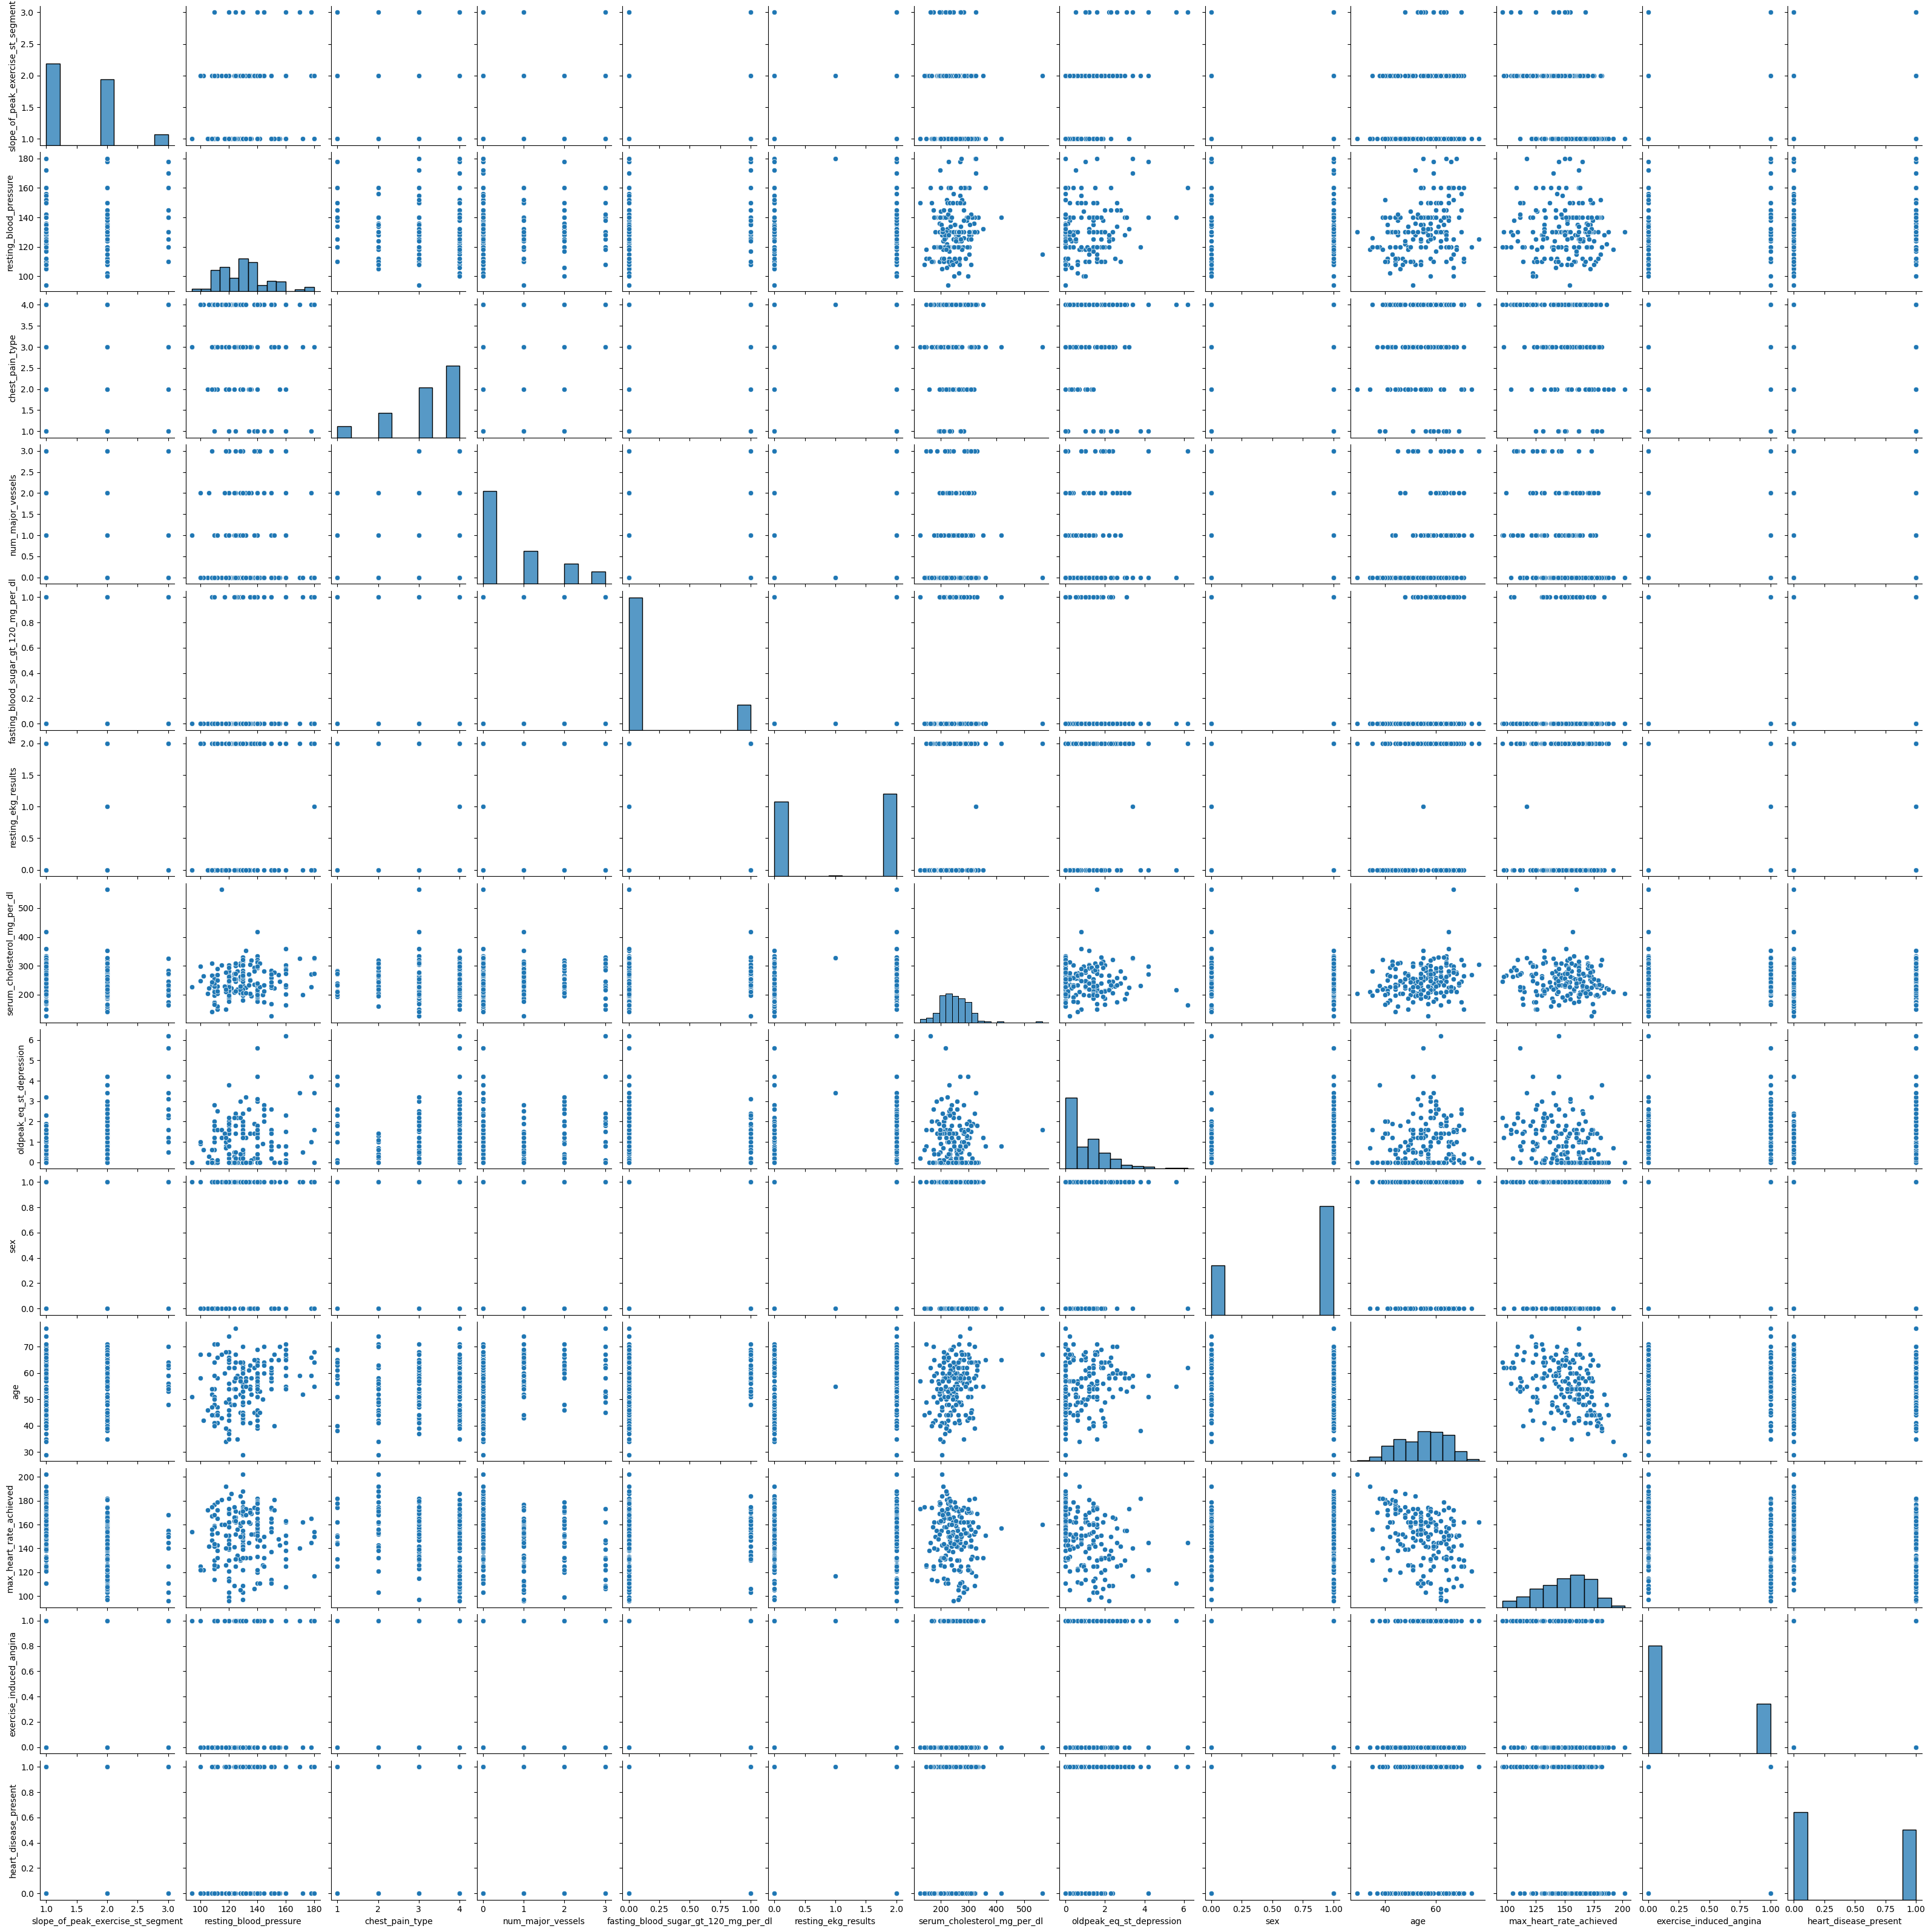

In [11]:
sns.pairplot(data) # Multivarient Analysis

**Insights:**

* **Correlations:** Some scatter plots show a positive or negative correlation between variables, indicating a linear relationship. For example, there seems to be a negative correlation between age and max_heart_rate_achieved, suggesting that as age increases, the maximum heart rate achieved tends to decrease.
* **Outliers:** Some plots show the presence of outliers, which can influence the correlation analysis.
* **Non-Linear Relationships:** Some scatter plots suggest non-linear relationships between variables, which might not be captured by a simple correlation analysis.

**Final report of EDA**

* **Demographic Variables:**
  * Age: The distribution is skewed to the right, suggesting a concentration of older patients.
  * Sex: The distribution is bimodal, indicating a relatively equal number of male and female patients.
* **Clinical Measurements:**
  * Serum Cholesterol: The distribution is skewed to the right, with a concentration of values around 200.
  * Resting Blood Pressure: The distribution is approximately normal, with a slight skew to the right.
  * Max Heart Rate Achieved: The distribution is skewed to the left, with a concentration of values around 175.
  * Oldpeak EQ ST Depression: The distribution is skewed to the right, with a concentration of values around 0.
  * Exercise Induced Angina: The distribution is skewed to the right, with a concentration of values around 0.
  * Resting EKG Results: The distribution is skewed to the right, with a concentration of values around 0.
* **Relationships Between Variables:**

* **Correlations:**
  * Age and Max Heart Rate Achieved: There seems to be a negative correlation, suggesting that as age increases, the maximum heart rate achieved tends to decrease.
  * Other Variables: The pairplot suggests potential correlations between other variables, which should be further explored using correlation analysis.
* **Categorical Variables:**
  * Chest Pain Type, Num Major Vessels, Resting EKG Results: These variables appear to be associated with heart disease presence, with certain categories having higher mean proportions of disease.
  * Slope of Peak Exercise ST Segment, Thal: These variables also show some association with heart disease, but the relationships are less clear.
* **Heart Disease Prediction:**

* Based on the analysis, variables like age, max heart rate achieved, chest pain type, num major vessels, resting EKG results, and exercise induced angina might be potential predictors of heart disease.
Further analysis, including feature selection and machine learning modeling, could be conducted to build a predictive model.

## Feature Engineering

* **Objective:** Enhance the dataset with meaningful features that improve model accuracy.
* **Actions:**
  * Normalize or standardize features to ensure comparability.

### Data Preprocessing

* **Objective:** Prepare the data for modeling.
* **Actions:**
  * Split the dataset into training and testing sets (80/20 split).
  * Address class imbalance using techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or undersampling.

#### **Data Cleaning**

In [12]:
data.isnull().sum() # Identify missing values or inconsistencies.

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

* **Insights**
  * There are no null values in columns

* find the unique values in columns 

In [13]:
# def find_unique_values(df):
#   """Finds the unique values in each column of a pandas DataFrame.

#   Args:
#     df: The pandas DataFrame to analyze.

#   Returns:
#     A dictionary where the keys are the column names and the values are lists of unique values.
#   """

#   unique_values = {}
#   for column in df.columns:
#     unique_values[column] = df[column].unique().tolist()
#   return unique_values

In [14]:
len(data.patient_id.unique()) # Unique values in Patient ID column

180

In [15]:
data.slope_of_peak_exercise_st_segment.unique() # Unique values in slope_of_peak_exercise_st_segment column

array([1, 2, 3], dtype=int64)

In [16]:
data.thal.unique() # Unique values in thal column

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [17]:
data.resting_blood_pressure.unique() # Unique values in resting_blood_pressure column

array([128, 110, 125, 152, 178, 130, 150, 170, 120, 140, 138, 144, 136,
       160, 108, 106, 156, 180, 112, 122, 124, 135, 105, 115, 126, 172,
       145, 118, 134, 100, 155, 132, 102,  94, 117, 142], dtype=int64)

In [18]:
data.chest_pain_type.unique() # Unique values in chest_pain_type column

array([2, 3, 4, 1], dtype=int64)

In [19]:
data.num_major_vessels.unique() # Unique values in num_major_vessels column

array([0, 3, 2, 1], dtype=int64)

In [20]:
data.fasting_blood_sugar_gt_120_mg_per_dl.unique() # Unique values in fasting_blood_sugar_gt_120_mg_per_dl column

array([0, 1], dtype=int64)

In [21]:
data.resting_ekg_results.unique() # Unique values in resting_ekg_results column

array([2, 0, 1], dtype=int64)

In [22]:
data.serum_cholesterol_mg_per_dl.unique() # Unique values in serum_cholesterol_mg_per_dl column

array([308, 214, 304, 223, 270, 180, 258, 276, 326, 219, 302, 226, 335,
       236, 231, 200, 234, 253, 204, 319, 233, 228, 245, 211, 303, 205,
       185, 175, 225, 203, 325, 230, 222, 126, 209, 269, 255, 243, 252,
       265, 417, 267, 261, 149, 281, 311, 315, 330, 256, 239, 295, 197,
       564, 305, 283, 160, 254, 282, 322, 250, 188, 220, 199, 215, 218,
       196, 266, 229, 259, 268, 177, 168, 262, 271, 299, 293, 141, 277,
       212, 321, 294, 313, 232, 289, 213, 274, 263, 244, 298, 172, 353,
       210, 192, 246, 286, 360, 174, 227, 248, 224, 300, 235, 217, 193,
       167, 216, 195, 309, 273, 198, 290, 275, 206, 164, 207, 249, 327,
       201], dtype=int64)

In [23]:
data.oldpeak_eq_st_depression.unique() # Unique values in oldpeak_eq_st_depression column

array([0. , 1.6, 4.2, 2.6, 0.6, 3.4, 0.4, 0.2, 3.8, 0.9, 1.4, 0.1, 0.3,
       2.3, 1.5, 3. , 2. , 1. , 3.1, 2.5, 0.8, 2.4, 1.8, 1.9, 2.8, 1.2,
       0.5, 2.2, 1.3, 1.1, 0.7, 3.2, 5.6, 6.2])

In [24]:
data.sex.unique() # Unique values in sex column

array([1, 0], dtype=int64)

In [25]:
data.age.unique() # Unique values in age column

array([45, 54, 77, 40, 59, 42, 60, 57, 50, 66, 64, 38, 29, 58, 71, 52, 67,
       70, 68, 51, 41, 65, 53, 48, 62, 74, 61, 63, 46, 43, 56, 44, 35, 55,
       49, 47, 37, 69, 39, 34], dtype=int64)

In [26]:
data.max_heart_rate_achieved.unique() # Unique values in max_heart_rate_achieved column

array([170, 158, 162, 181, 145, 150, 157, 112, 140, 151, 178, 152, 182,
       126, 175, 144, 202, 147, 142, 138, 143, 115, 159, 184, 155, 123,
       168, 114, 154, 165, 186, 173, 163, 121, 161, 137, 172, 130, 167,
       141, 166, 125, 103, 120, 132, 169, 179,  99, 177, 160, 156, 109,
       139, 134, 113, 149, 174, 131, 148, 153, 133, 122, 105, 106, 192,
       108,  96, 171, 180, 188, 111,  97, 117], dtype=int64)

In [27]:
data.exercise_induced_angina.unique() # Unique values in exercise_induced_angina column

array([0, 1], dtype=int64)

In [28]:
data.heart_disease_present.unique() # Unique values in heart_disease_present column

array([0, 1], dtype=int64)

* **see the outliers in all features**

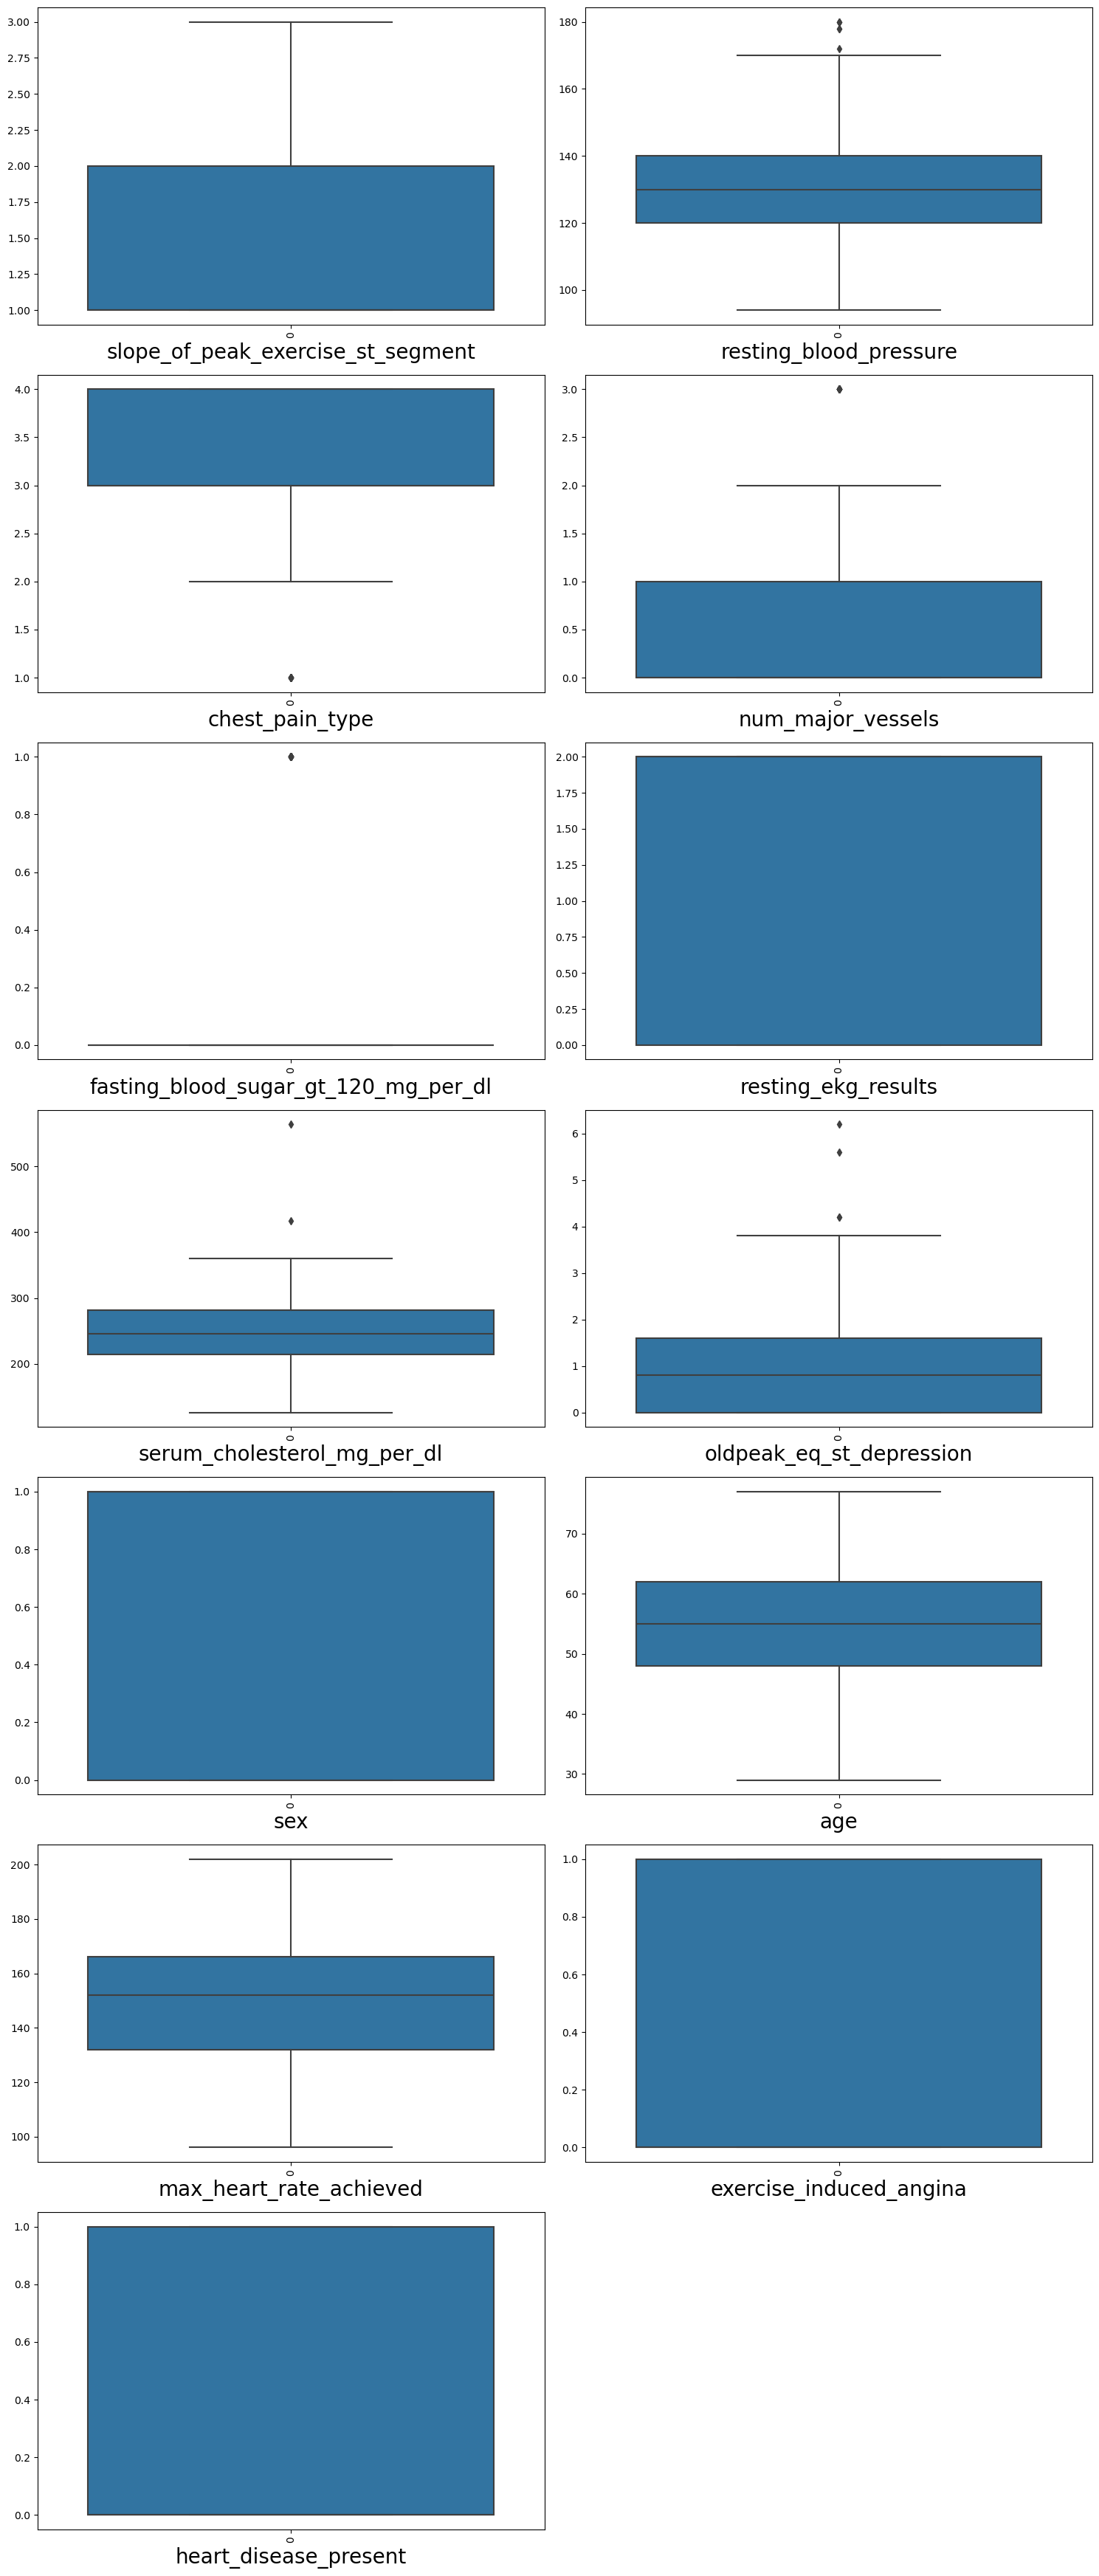

In [29]:
plt.figure(figsize=(15,35)) # we define the figure size
plt_num = 1
for column in data.drop(["patient_id","thal"],axis=1):
    if plt_num <= 13: # Number of plots we require of columns
        plt.subplot(7, 2,plt_num) # define number of subplot in dataset of columns 
        sns.boxplot(data[column]) # here we draw the boxplot of all the columns 
        plt.xlabel(column,fontsize = 20) # To give label to x-axis and fontsize of it label
        plt.xticks(rotation = 90) # assign the x-label column and rotate their name to 90 degree
    plt_num += 1
plt.tight_layout() # use for data show function

* Here **resting_blood_pressure**, **chest_pain_type**, **num_major_vessels**, **fasting_blood_sugar_gt_120_mg_per_dl**, **serum_cholesterol_mg_per_dl**, **oldpeak_eq_st_depression** in this columns we have outliers.

* Now we handle the outliers with mean, median, mode statistical method.

**resting_blood_pressure**

In [30]:
data.loc[(data.resting_blood_pressure) > 170, "resting_blood_pressure"] = 130 # handle the outliers

* Here we hanlde the resting_blood_pressure column outlier with **mode** because the columns data has discrete values

<Axes: xlabel='resting_blood_pressure'>

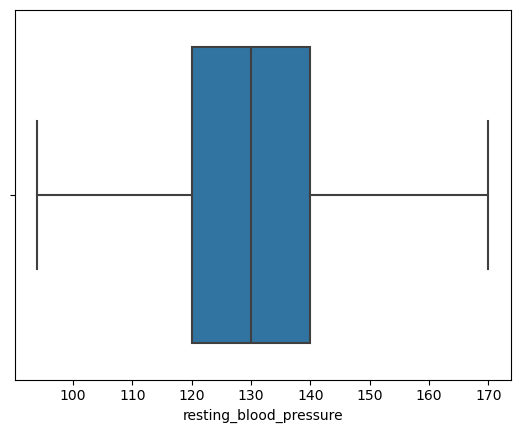

In [31]:
sns.boxplot(x=data.resting_blood_pressure) # now we handled the outlier of the resting_blood_pressure column

**chest_pain_type**

In [32]:
data.loc[(data.chest_pain_type) == 1, "chest_pain_type"] = 4 # handle the outliers

* Here we hanlde the chest_pain_type column outlier with **mode** because the columns data has discrete values

<Axes: xlabel='chest_pain_type'>

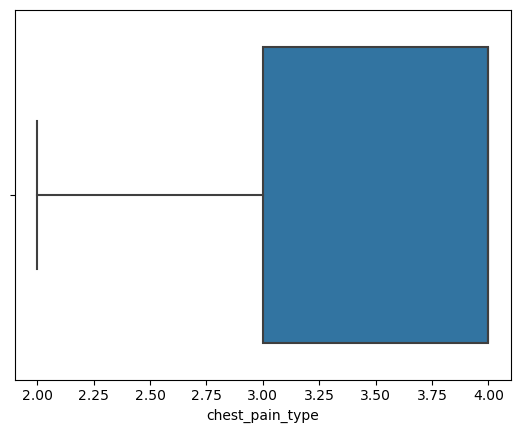

In [33]:
sns.boxplot(x=data.chest_pain_type) # now we handled the outlier of the chest_pain_type column

**num_major_vessels**

In [34]:
data.loc[(data.num_major_vessels) == 3, "num_major_vessels"] = 0 # handle the outliers

* Here we hanlde the num_major_vessels column outlier with **mode** because the columns data has discrete values

<Axes: xlabel='num_major_vessels'>

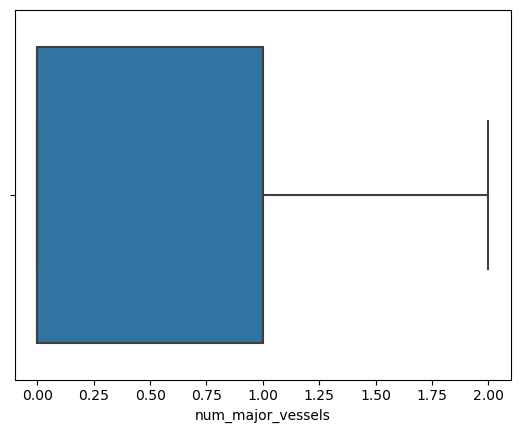

In [35]:
sns.boxplot(x=data.num_major_vessels) # now we handled the outlier of the num_major_vessels column

**fasting_blood_sugar_gt_120_mg_per_dl**

In [36]:
data.loc[(data.fasting_blood_sugar_gt_120_mg_per_dl) == 1, "fasting_blood_sugar_gt_120_mg_per_dl"] = 0 # handle the outliers

* Here we hanlde the fasting_blood_sugar_gt_120_mg_per_dl column outlier with **mode** because the columns data has discrete values

<Axes: xlabel='fasting_blood_sugar_gt_120_mg_per_dl'>

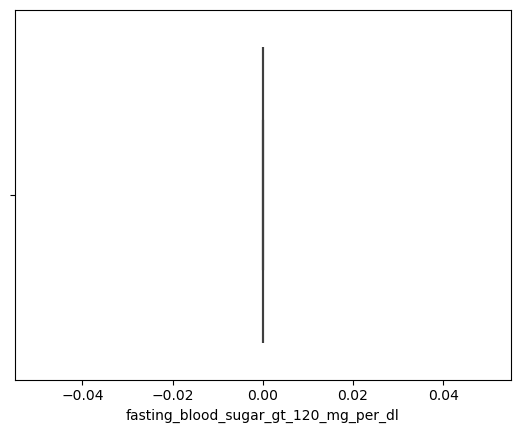

In [37]:
sns.boxplot(x=data.fasting_blood_sugar_gt_120_mg_per_dl) # now we handled the outlier of the fasting_blood_sugar_gt_120_mg_per_dl column

**serum_cholesterol_mg_per_dl**

In [38]:
data.loc[(data.serum_cholesterol_mg_per_dl) > 400, "serum_cholesterol_mg_per_dl"] = 204 # handle the outliers

* Here we hanlde the serum_cholesterol_mg_per_dl column outlier with **mode** because the columns data has discrete values

<Axes: xlabel='serum_cholesterol_mg_per_dl'>

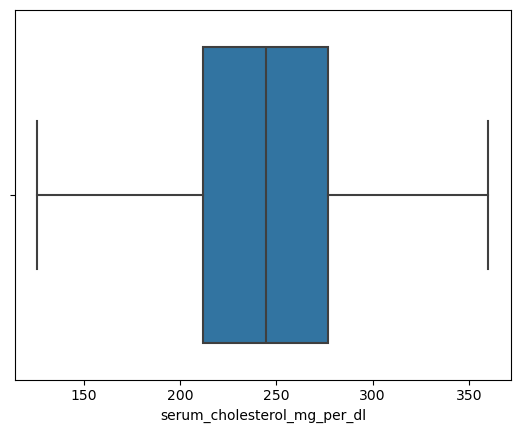

In [39]:
sns.boxplot(x=data.serum_cholesterol_mg_per_dl) # now we handled the outlier of the serum_cholesterol_mg_per_dl column

**oldpeak_eq_st_depression**

In [40]:
data.loc[(data.oldpeak_eq_st_depression) > 4, "oldpeak_eq_st_depression"] = 0.8 # handle the outliers

* Here we hanlde the oldpeak_eq_st_depression column outlier with **median** because the columns data has continuous values

<Axes: xlabel='oldpeak_eq_st_depression'>

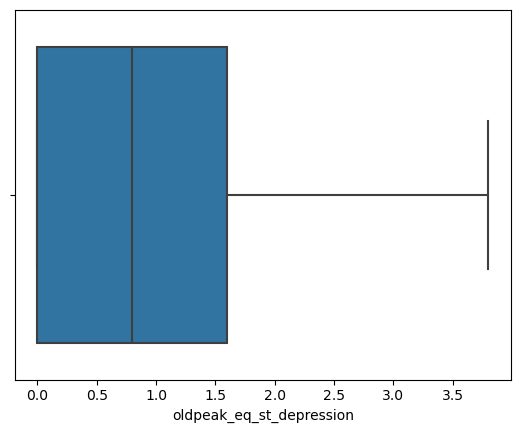

In [41]:
sns.boxplot(x=data.oldpeak_eq_st_depression) # now we handled the outlier of the oldpeak_eq_st_depression column

**patient_id**

<Axes: xlabel='patient_id', ylabel='count'>

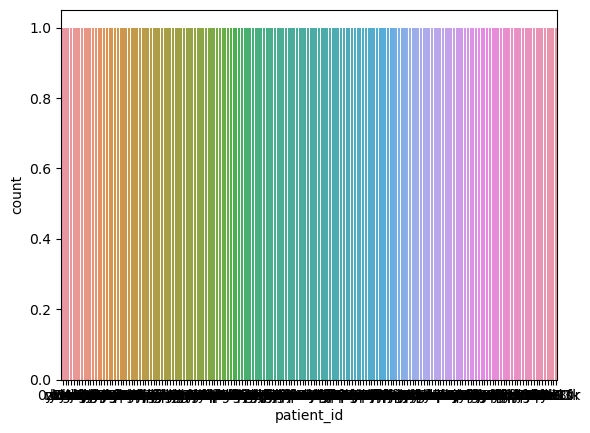

In [42]:
sns.countplot(x=data.patient_id, data=data) # see the categorical columns values

**thal**

<Axes: xlabel='thal', ylabel='count'>

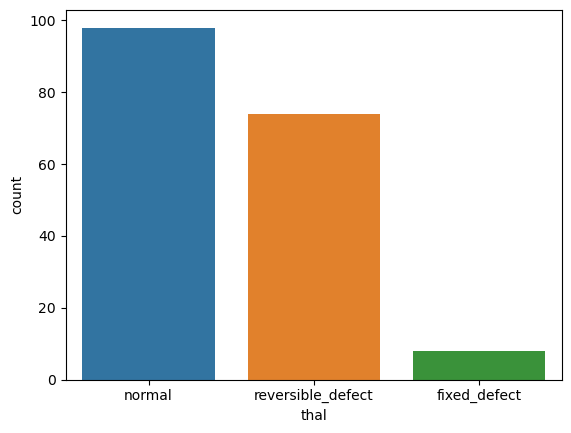

In [43]:
sns.countplot(x=data.thal, data=data) # see the categorical columns values

## Data Transformation:
* Encode categorical variables.

* __Label encoding columns:__ patient_id, thal
* __One-Hot Encoding columns:__ sex, thal, chest_pain_type, resting_ekg_results, exercise_induced_angina,                                  slope_of_peak_exercise_st_segment, num_major_vessels.

__Apply Label Encoding__

In [45]:
from sklearn.preprocessing import LabelEncoder # Import Library for encoding

In [46]:
# Label Encoding
label_encoder = LabelEncoder() # save the Label Encoder

label_columns = ["patient_id","thal"] # creating a list for encoding
for col in label_columns: # creating a for loop
    data[col] = label_encoder.fit_transform(data[col]) # Transform the categorical columns into numerical columns

__Apply One-Hot Encoding__

In [47]:
# Creating separate column for all below columns as per their unique values
data = pd.get_dummies(data, columns=['sex','thal','chest_pain_type','resting_ekg_results','exercise_induced_angina',
                                     'slope_of_peak_exercise_st_segment','num_major_vessels'], dtype=int) 

## Feature Selection
* **Identify Important Features:**
  * Use correlation analysis and feature importance metrics .

In [50]:
data.corr() # Check the correlation of all features

,patient_id,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,heart_disease_present,sex_0,sex_1,...,resting_ekg_results_1,resting_ekg_results_2,exercise_induced_angina_0,exercise_induced_angina_1,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2
patient_id,1.000000,0.054130,NaN,-0.080230,-0.104404,0.033113,0.036123,-0.029908,-0.058200,0.058200,...,-0.097096,0.061646,-0.003103,0.003103,0.038405,-0.050856,0.023574,0.115445,-0.069452,-0.078946
resting_blood_pressure,0.054130,1.000000,NaN,0.164035,0.110505,0.259479,-0.014901,0.076048,0.016618,-0.016618,...,0.001482,0.113087,-0.056117,0.056117,-0.008494,-0.059807,0.135220,0.002966,-0.044638,0.049845
fasting_blood_sugar_gt_120_mg_per_dl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serum_cholesterol_mg_per_dl,-0.080230,0.164035,NaN,1.000000,-0.009950,0.186937,-0.111997,0.154782,0.071870,-0.071870,...,0.133041,0.120385,-0.143716,0.143716,0.023563,0.010136,-0.067237,-0.112780,0.043812,0.106219
oldpeak_eq_st_depression,-0.104404,0.110505,NaN,-0.009950,1.000000,0.202029,-0.324242,0.388253,-0.121071,0.121071,...,0.199921,0.103429,-0.263756,0.263756,-0.549931,0.444433,0.223314,-0.117574,-0.015919,0.185292
age,0.033113,0.259479,NaN,0.186937,0.202029,1.000000,-0.394630,0.138255,0.148997,-0.148997,...,0.001517,0.126357,-0.081811,0.081811,-0.164134,0.120046,0.091555,-0.330854,0.187545,0.240167
max_heart_rate_achieved,0.036123,-0.014901,NaN,-0.111997,-0.324242,-0.394630,1.000000,-0.375352,0.053960,-0.053960,...,-0.110349,-0.094242,0.365065,-0.365065,0.439621,-0.367862,-0.153660,0.181580,-0.198625,-0.015972
heart_disease_present,-0.029908,0.076048,NaN,0.154782,0.388253,0.138255,-0.375352,1.000000,-0.335421,0.335421,...,0.083566,0.139271,-0.448647,0.448647,-0.365428,0.309931,0.119523,-0.292511,0.153704,0.226987
sex_0,-0.058200,0.016618,NaN,0.071870,-0.121071,0.148997,0.053960,-0.335421,1.000000,-1.000000,...,0.111222,-0.053922,0.251096,-0.251096,0.049629,0.016227,-0.131497,0.067884,-0.104266,0.030355
sex_1,0.058200,-0.016618,NaN,-0.071870,0.121071,-0.148997,-0.053960,0.335421,-1.000000,1.000000,...,-0.111222,0.053922,-0.251096,0.251096,-0.049629,-0.016227,0.131497,-0.067884,0.104266,-0.030355


<Axes: >

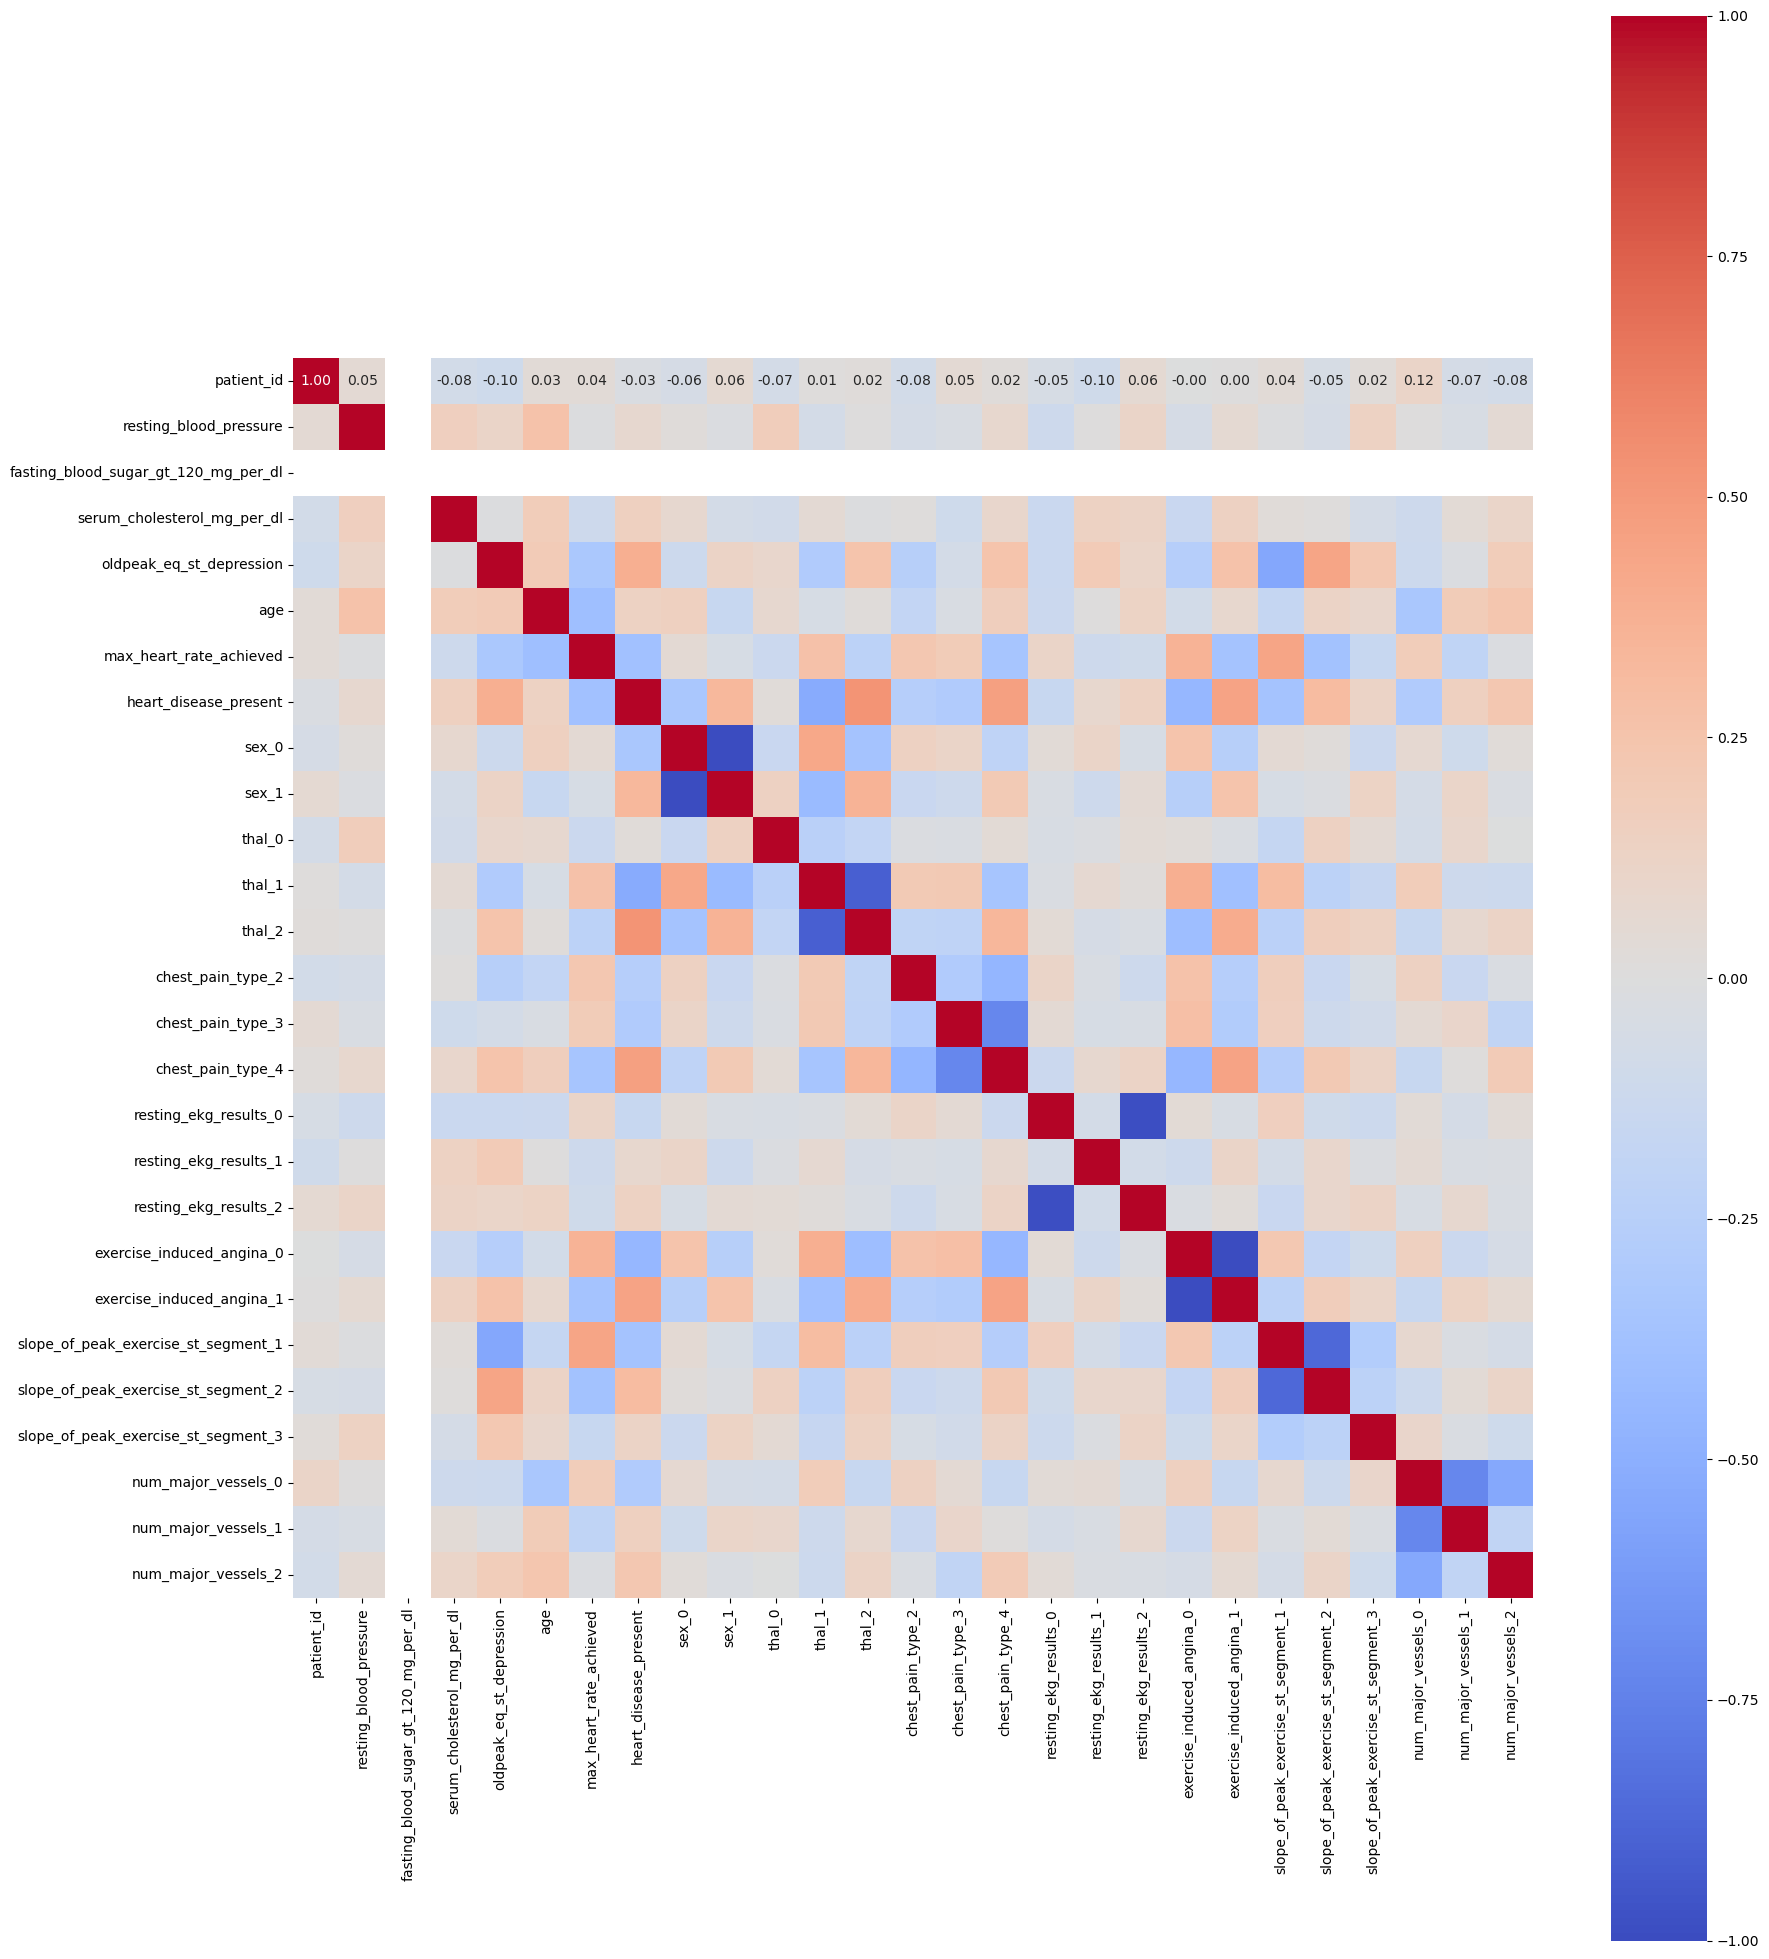

In [51]:
# Here is heatmap of correlation of all features
plt.figure(figsize=(20, 25))  # Set the figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True) # ploting the heat map for checking correlation

**Insights**

**Columns to Keep**
* **slope_of_peak_exercise_st_segment:** Shows a moderate correlation with heart disease presence (0.344) and can provide valuable information about cardiac stress response.
* **thal:** Strong correlation with heart disease presence (0.447), making it important for predictions.
* **resting_blood_pressure:** Low correlation with heart disease presence (0.076), but it is a relevant risk factor in cardiovascular health.
* **chest_pain_type:** Moderate correlation with heart disease (0.443), indicating its importance in assessment.
* **num_major_vessels:** Moderate positive correlation (0.301) with heart disease, suggesting relevance.
* **resting_ekg_results:** Some correlation with heart disease (0.146), making it useful in the analysis.
* **serum_cholesterol_mg_per_dl:** Low correlation (0.155) with heart disease but is an important risk factor, so it should be retained.
* **oldpeak_eq_st_depression:** Shows a moderate correlation with heart disease presence (0.263) and is crucial for understanding exercise-induced ischemia.
* **sex:** Moderate correlation (0.335) with heart disease, relevant for gender-related analysis.
* **age:** Correlates moderately (0.138) with heart disease, important for age-related risk assessment.
* **max_heart_rate_achieved:** Negative correlation (-0.375) suggests that lower max heart rates could be associated with heart disease presence, making it relevant.
* **exercise_induced_angina:** Strong positive correlation (0.449) with heart disease, making it crucial for analysis.
* **heart_disease_present:** This is the target variable and should always be kept.

**Columns to Consider Deleting**
* **patient_id:** This is a unique identifier and does not contribute to the analysis of health metrics.
* **fasting_blood_sugar_gt_120_mg_per_dl:** It appears to have NaN values and does not correlate strongly with other relevant factors, indicating it may not provide significant insights.

* So we are drop this patient_id, fasting_blood_sugar_gt_120_mg_per_dl columns.

In [52]:
data.drop(["patient_id"],axis=1,inplace=True) # , "fasting_blood_sugar_gt_120_mg_per_dl" # here we deleting the uncorrelate columns

## Model Selection

* **Objective:** Choose the most appropriate predictive models.
* **Actions:**
  * Test various algorithms (e.g., Logistic Regression, Random Forest, Gradient Boosting, Support Vector Machines).
  * Evaluate models based on metrics such as accuracy, precision, recall, and F1 score.

### Scaling
* Now we apply the scaling.

In [55]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler # importing Scaler for transform the data in the certain range

In [58]:
scaler = StandardScaler() # save the StandardScaler

# We applying scaling on this columns
Scaler_features = data[['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved']]

scaled_data = scaler.fit_transform(Scaler_features) # Apply Min-Max Scaling

scaled_df = pd.DataFrame(scaled_data, columns=Scaler_features.columns) # Convert back to a DataFrame

In [63]:
data.drop(['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved'],
          axis=1,inplace=True) # drop the old columns

In [65]:
data = pd.concat([data,scaled_df],axis=1) # Concat with original DataFrame

#### **Handling Class Imbalance**

In [68]:
data.heart_disease_present.value_counts() # Here we check the balancing of the target variablem

heart_disease_present
0    100
1     80
Name: count, dtype: int64

* Here we can see the target variable is imbalance so we applying SMOTE (Synthetic Minority Over-sampling Technique)

In [276]:
data # see the data

,fasting_blood_sugar_gt_120_mg_per_dl,heart_disease_present,sex_0,sex_1,thal_0,thal_1,thal_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,...,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
0,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,-0.117432,1.362305,-0.985690,-1.053964,0.932485
1,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,-1.352755,-0.704051,0.736875,-0.087134,0.387084
2,0,1,0,1,0,1,0,0,0,1,...,0,0,1,0,0,-0.323319,1.274375,-0.985690,2.383654,0.568884
3,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1.529666,-0.506208,-0.985690,-1.591092,1.432436
4,0,0,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0.019826,0.526970,-0.124407,0.449994,-0.203768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,1,-0.323319,0.175249,-0.770369,1.309398,0.614334
176,0,1,1,0,0,1,0,0,0,1,...,1,0,1,0,0,0.019826,1.779973,2.674760,0.020291,-1.476372
177,0,1,0,1,0,0,1,0,1,0,...,1,0,1,0,0,-0.323319,1.384287,0.952195,0.987122,-0.840070
178,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,-0.391948,0.197232,-0.985690,-0.731688,1.159736


In [70]:
X = data.drop(["heart_disease_present"],axis=1) # define the X
y = data.heart_disease_present # define the y

In [71]:
from imblearn.over_sampling import SMOTE # importing the SMOTE from over sampling method

smote = SMOTE() # save the SMOTE

X_resampled, y_resampled = smote.fit_resample(X, y) # Fit and transform the data

In [72]:
from collections import Counter # for calculate the target variable

In [73]:
print(Counter(y)) # print the actual y variable
print(Counter(y_resampled)) # print the y variable after applying SMOTE

Counter({0: 100, 1: 80})
Counter({0: 100, 1: 100})


## Modeling
* **Train-Test Split:**
  * Split the dataset into training and testing sets (80/20 split).

In [74]:
from sklearn.model_selection import train_test_split  # importing train_test_split for spliting the data into training and testing

In [75]:
# Here we split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=3)

## Model Creation

### Model Training and Tuning

* **Objective:** Optimize model performance.
* **Actions:**
  * Use cross-validation to validate model performance.
  * Fine-tune hyperparameters using techniques such as Grid Search or Random Search.

## Model Evaluation

* **Objective:** Assess the final model's performance on unseen data.
* **Actions:**
  * Evaluate the model using the train and test dataset.

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # importing the metrics of classfication

### **Logistic Regression**

In [81]:
from sklearn.linear_model import LogisticRegression # importing the Logistic regression Algorithm

In [82]:
LR_model = LogisticRegression() # save the model

In [83]:
LR_model.fit(X_train,y_train) # Train the model

LogisticRegression()

In [84]:
LR_train_predict = LR_model.predict(X_train) # Prediction for training
LR_test_predict = LR_model.predict(X_test) # Prediction for testing

In [85]:
LR_training_accuracy = accuracy_score(y_train,LR_train_predict) # accuracy for training
LR_testing_accuracy = accuracy_score(y_test,LR_test_predict) # accuracy for testing

In [86]:
print(LR_training_accuracy) # See the Training accuracy
print(LR_testing_accuracy)# See the Testing accuracy

0.8375
0.875


#### **Hyperparameter tuning for Logistic Regression**

In [87]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [88]:
# Define the hyperparameter grid
param_grid_LR = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],      # Optimization algorithm
    'penalty': ['l2', 'none'],             # Regularization type
}

# Create the GridSearchCV object
grid_search_LR = GridSearchCV(LR_model, param_grid_LR, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_LR.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_LR.best_params_)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [89]:
# Best model
LR_HPT_model = grid_search_LR.best_estimator_

In [90]:
LR_HPT_train_predict = LR_HPT_model.predict(X_train)  # Prediction for training
LR_HPT_test_predict = LR_HPT_model.predict(X_test)  # Prediction for testing

In [91]:
# Calculate accuracy for training and testing
LR_HPT_training_accuracy = accuracy_score(y_train, LR_HPT_train_predict)  # Accuracy for training
LR_HPT_testing_accuracy = accuracy_score(y_test, LR_HPT_test_predict)  # Accuracy for testing

In [92]:
print("Training Accuracy:", LR_HPT_training_accuracy) # See the training accuracy
print("Testing Accuracy:", LR_HPT_testing_accuracy) # See the Testing accuracy

Training Accuracy: 0.85
Testing Accuracy: 0.775


### **Support Vector Machine (SVM)**

In [93]:
from sklearn.svm import SVC # Importing the SVM Algorithm

In [94]:
SVM_model = SVC() #kernel="rbf",gamma="auto",C=1 # save the model 

In [95]:
SVM_model.fit(X_train,y_train) # Train the model

SVC()

In [96]:
SVM_train_predict = SVM_model.predict(X_train) # Prediction for training
SVM_test_predict = SVM_model.predict(X_test) # Prediction for testing

In [97]:
SVM_training_accuracy = accuracy_score(y_train,SVM_train_predict) # accuracy for training
SVM_testing_accuracy = accuracy_score(y_test,SVM_test_predict) # accuracy for testing

In [98]:
SVM_training_accuracy # See the Testing accuracy

0.925

In [99]:
SVM_testing_accuracy # See the Testing accuracy

0.875

#### **Hyperparameter tuning For SVM**

In [100]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [101]:
# Define the parameter grid for hyperparameter tuning
param_grid_SVM = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create the GridSearchCV object
grid_search_SVM = GridSearchCV(
    SVM_model,
    param_grid_SVM,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
grid_search_SVM.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search_SVM.best_params_)
print("Best Score:", grid_search_SVM.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.8375


In [102]:
# Make predictions with the best estimator
SVM_HPT_model = grid_search_SVM.best_estimator_

In [103]:
SVM_HPT_train_predict = SVM_HPT_model.predict(X_train)  # Prediction for training
SVM_HPT_test_predict = SVM_HPT_model.predict(X_test)  # Prediction for testing

In [104]:
# Calculate accuracy for training and testing
SVM_HPT_training_accuracy = accuracy_score(y_train, SVM_HPT_train_predict)  # Accuracy for training
SVM_HPT_testing_accuracy = accuracy_score(y_test, SVM_HPT_test_predict)  # Accuracy for testing

In [105]:
print("Training Accuracy:", SVM_HPT_training_accuracy) # See the training accuracy
print("Testing Accuracy:", SVM_HPT_testing_accuracy) # See the Testing accuracy

Training Accuracy: 0.875
Testing Accuracy: 0.775


### **Decision Tree**

In [106]:
from sklearn.tree import DecisionTreeClassifier # importing the Decision Tree Algorithm

In [107]:
DT_model = DecisionTreeClassifier() # save the model

In [108]:
DT_model.fit(X_train,y_train) # Train the model

DecisionTreeClassifier()

In [109]:
DT_train_predict = DT_model.predict(X_train) # Prediction for training
DT_test_predict = DT_model.predict(X_test) # Prediction for testing

In [110]:
DT_training_accuracy = accuracy_score(y_train,DT_train_predict) # accuracy for training
DT_testing_accuracy = accuracy_score(y_test,DT_test_predict) # accuracy for testing

In [111]:
DT_training_accuracy # See the training accuracy

1.0

In [112]:
DT_testing_accuracy # See the Testing accuracy

0.725

#### **Hyperparameter tuning For Decision Tree**

In [113]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [114]:
# Define the hyperparameter grid
param_grid_DT = {
    'criterion': ['gini', 'entropy'],          # Split quality measure
    'max_depth': [None, 10, 20, 30, 40, 50],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5, 10],         # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
}

# Create the GridSearchCV object
grid_search_DT = GridSearchCV(DT_model, param_grid_DT, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_DT.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_DT.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2}


In [115]:
# Best model
DT_HPT_model = grid_search_DT.best_estimator_

In [116]:
DT_HPT_train_predict = DT_HPT_model.predict(X_train)  # Prediction for training
DT_HPT_test_predict = DT_HPT_model.predict(X_test)  # Prediction for testing

In [117]:
# Calculate accuracy for training and testing
DT_HPT_training_accuracy = accuracy_score(y_train, DT_HPT_train_predict)  # Accuracy for training
DT_HPT_testing_accuracy = accuracy_score(y_test, DT_HPT_test_predict)  # Accuracy for testing

In [118]:
print("Training Accuracy:", DT_HPT_training_accuracy) # See the training accuracy
print("Testing Accuracy:", DT_HPT_testing_accuracy) # See the Testing accuracy

Training Accuracy: 0.8125
Testing Accuracy: 0.8


### **Random Forest**

In [119]:
from sklearn.ensemble import RandomForestClassifier # importing the Random Forest Algorithm

In [120]:
RF_model = RandomForestClassifier() # save the model

In [121]:
RF_model.fit(X_train,y_train) # Train the model

RandomForestClassifier()

In [122]:
RF_train_predict = RF_model.predict(X_train) # Prediction for training
RF_test_predict = RF_model.predict(X_test) # Prediction for testing

In [123]:
RF_training_accuracy = accuracy_score(y_train,RF_train_predict) # accuracy for training
RF_testing_accuracy = accuracy_score(y_test,RF_test_predict) # accuracy for testing

In [124]:
RF_training_accuracy # see the training accuracy

1.0

In [125]:
RF_testing_accuracy # see the testing accuracy

0.875

#### **Hyperparameter tuning For Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [126]:
# Define the parameter grid for hyperparameter tuning
param_grid_RF = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search_RF = GridSearchCV(
    RF_model,
    param_grid_RF,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
grid_search_RF.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search_RF.best_params_)
print("Best Score:", grid_search_RF.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8125


In [127]:
# Make predictions with the best estimator
RF_HPT_model = grid_search_RF.best_estimator_

In [128]:
RF_HPT_train_predict = RF_HPT_model.predict(X_train)  # Prediction for training
RF_HPT_test_predict = RF_HPT_model.predict(X_test)  # Prediction for testing

In [129]:
# Calculate accuracy for training and testing
RF_HPT_training_accuracy = accuracy_score(y_train, RF_HPT_train_predict)  # Accuracy for training
RF_HPT_testing_accuracy = accuracy_score(y_test, RF_HPT_test_predict)  # Accuracy for testing

In [130]:
print("Training Accuracy:", RF_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", RF_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.99375
Testing Accuracy: 0.85


### **K-Nearest Neighbors (KNN)**

In [131]:
from sklearn.neighbors import KNeighborsClassifier # importing the KKN Algorithm

In [132]:
KNN_model = KNeighborsClassifier() # save the model

In [133]:
KNN_model.fit(X_train,y_train) # Train the model

KNeighborsClassifier()

In [134]:
KNN_train_predict = KNN_model.predict(X_train) # Prediction for training
KNN_test_predict = KNN_model.predict(X_test) # Prediction for testing

In [135]:
KNN_training_accuracy = accuracy_score(y_train,KNN_train_predict) # accuracy for training
KNN_testing_accuracy = accuracy_score(y_test,KNN_test_predict) # accuracy for testing

#### **Hyperparameter tuning of K-Nearest Neighbors (KNN)**

In [136]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [137]:
# Define the parameter grid for hyperparameter tuning
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # Different values for n_neighbors
    'weights': ['uniform', 'distance'],  # Weighting functions
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Create the GridSearchCV object
grid_search_KNN = GridSearchCV(
    KNN_model,
    param_grid_KNN,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
grid_search_KNN.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search_KNN.best_params_)
print("Best Score:", grid_search_KNN.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best Score: 0.85


In [138]:
# Make predictions with the best estimator
KNN_HPT_model = grid_search_KNN.best_estimator_

In [139]:
KNN_HPT_train_predict = KNN_HPT_model.predict(X_train)  # Prediction for training
KNN_HPT_test_predict = KNN_HPT_model.predict(X_test)  # Prediction for testing

In [140]:
# Calculate accuracy for training and testing
KNN_HPT_training_accuracy = accuracy_score(y_train, KNN_HPT_train_predict)  # Accuracy for training
KNN_HPT_testing_accuracy = accuracy_score(y_test, KNN_HPT_test_predict)  # Accuracy for testing

In [141]:
print("Training Accuracy:", KNN_HPT_training_accuracy)
print("Testing Accuracy:", KNN_HPT_testing_accuracy)

Training Accuracy: 0.86875
Testing Accuracy: 0.825


### **Naive Bayes**

In [142]:
from sklearn.naive_bayes import GaussianNB # importing the naive bayes Algorithm

In [143]:
naive_bayes_model = GaussianNB() # save the model

In [144]:
naive_bayes_model.fit(X_train,y_train) # Train the model

GaussianNB()

In [146]:
naive_bayes_model_train_predict = naive_bayes_model.predict(X_train) # Prediction for training
naive_bayes_model_test_predict = naive_bayes_model.predict(X_test) # Prediction for testing

In [147]:
naive_bayes_training_accuracy = accuracy_score(y_train, naive_bayes_model_train_predict) # accuracy for training
naive_bayes_testing_accuracy = accuracy_score(y_test, naive_bayes_model_test_predict) # accuracy for testing

In [148]:
naive_bayes_training_accuracy # see the training accuracy

0.775

In [149]:
naive_bayes_testing_accuracy # see the testing accuracy

0.85

#### **Hyperparameter Tuning of Naive Bayes**

In [ ]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [150]:
# Define the parameter grid for hyperparameter tuning
param_grid_naive_bayes = {
    'var_smoothing': np.logspace(0, -9, num=100)  # A range of values for var_smoothing
}

# Create the GridSearchCV object
naive_bayes_grid_search = GridSearchCV(
    naive_bayes_model,
    param_grid_naive_bayes,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
naive_bayes_grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", naive_bayes_grid_search.best_params_)
print("Best Score:", naive_bayes_grid_search.best_score_)

Best Parameters: {'var_smoothing': 1.0}
Best Score: 0.85625


In [151]:
# Make predictions with the best estimator
naive_bayes_HPT_model = naive_bayes_grid_search.best_estimator_

In [152]:
naive_bayes_HPT_train_predict = naive_bayes_HPT_model.predict(X_train)  # Prediction for training
naive_bayes_HPT_test_predict = naive_bayes_HPT_model.predict(X_test)  # Prediction for testing

In [247]:
# Calculate accuracy for training and testing
naive_bayes_HPT_training_accuracy = accuracy_score(y_train, naive_bayes_HPT_train_predict)  # Accuracy for training
naive_bayes_HPT_testing_accuracy = accuracy_score(y_test, naive_bayes_HPT_test_predict)  # Accuracy for testing

In [248]:
print("Training Accuracy:", naive_bayes_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", naive_bayes_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.86875
Testing Accuracy: 0.825


### **Gradient Boosting**

In [157]:
from sklearn.ensemble import GradientBoostingClassifier # Importing Gradient Boosting Algorithm

In [158]:
GB_model = GradientBoostingClassifier() # save the model

In [159]:
GB_model.fit(X_train,y_train) # Train the model

GradientBoostingClassifier()

In [160]:
GB_train_predict = GB_model.predict(X_train) # Prediction for training
GB_test_predict = GB_model.predict(X_test) # Prediction for testing

In [161]:
GB_training_accuracy = accuracy_score(y_train,GB_train_predict) # accuracy for training
GB_testing_accuracy = accuracy_score(y_test,GB_test_predict) # accuracy for testing

In [162]:
GB_training_accuracy # see the training accuracy

1.0

In [163]:
GB_testing_accuracy # see the testing accuracy

0.8

#### **Hyperparameter Tuning for Gradient Boosting**

In [164]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [165]:
# Define the hyperparameter grid
param_grid_GB = {
    'n_estimators': [50, 100, 200],            # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage used in updates
    'max_depth': [3, 5, 7],                    # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],             # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 1.0]                    # Fraction of samples to be used for fitting the individual base learners
}

# Create the GridSearchCV object
grid_search_GB = GridSearchCV(GB_model, param_grid_GB, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_GB.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_GB.best_params_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 0.8}


In [166]:
# Best model
GB_HPT_model = grid_search_GB.best_estimator_

In [167]:
GB_HPT_train_predict = GB_HPT_model.predict(X_train)  # Prediction for training
GB_HPT_test_predict = GB_HPT_model.predict(X_test)  # Prediction for testing

In [170]:
# Calculate accuracy for training and testing
GB_HPT_training_accuracy = accuracy_score(y_train, GB_HPT_train_predict)  # Accuracy for training
GB_HPT_testing_accuracy = accuracy_score(y_test, GB_HPT_test_predict)  # Accuracy for testing

In [172]:
print("Training Accuracy:", GB_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", GB_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.8


### **Ada Boosting**

In [173]:
from sklearn.ensemble import AdaBoostClassifier # Importing Ada Boosting Algorithm

In [174]:
AD_model = AdaBoostClassifier() # save the model

In [175]:
AD_model.fit(X_train,y_train) # Train the model

AdaBoostClassifier()

In [176]:
AD_train_predict = AD_model.predict(X_train) # Prediction for training
AD_test_predict = AD_model.predict(X_test) # Prediction for testing

In [177]:
AD_training_accuracy = accuracy_score(y_train,AD_train_predict) # accuracy for training
AD_testing_accuracy = accuracy_score(y_test,AD_test_predict) # accuracy for testing

In [178]:
AD_training_accuracy # see the training accuracy

0.98125

In [179]:
AD_testing_accuracy # see the testing accuracy

0.825

#### **Hyperparameter Tuning for Ada Boosting**

In [180]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [181]:
# Define the hyperparameter grid
param_grid_AD = {
    'n_estimators': [50, 100, 200],            # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0],         # Weight applied to each classifier
    'base_estimator': [None, DecisionTreeClassifier(max_depth=1)]  # Base estimator
}

# Create the GridSearchCV object
grid_search_AD = GridSearchCV(AD_model, param_grid_AD, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_AD.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_AD.best_params_)

Best Hyperparameters: {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.1, 'n_estimators': 50}


In [182]:
# Best model
AD_HPT_model = grid_search_AD.best_estimator_

In [183]:
AD_HPT_train_predict = AD_HPT_model.predict(X_train)  # Prediction for training
AD_HPT_test_predict = AD_HPT_model.predict(X_test)  # Prediction for testing

In [184]:
# Calculate accuracy for training and testing
AD_HPT_training_accuracy = accuracy_score(y_train, AD_HPT_train_predict)  # Accuracy for training
AD_HPT_testing_accuracy = accuracy_score(y_test, AD_HPT_test_predict)  # Accuracy for testing

In [185]:
print("Training Accuracy:", AD_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", AD_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.85
Testing Accuracy: 0.825


### **Xtreme Gradient Boosting**

In [186]:
from xgboost import XGBClassifier # Importing Xtreme Gradient Boosting Algorithm

In [187]:
XGB_model = XGBClassifier() # save the model

In [188]:
XGB_model.fit(X_train,y_train) # Train the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [189]:
XGB_train_predict = XGB_model.predict(X_train) # Prediction for training
XGB_test_predict = XGB_model.predict(X_test) # Prediction for testing

In [190]:
XGB_training_accuracy = accuracy_score(y_train,XGB_train_predict) # accuracy for training
XGB_testing_accuracy = accuracy_score(y_test,XGB_test_predict) # accuracy for testing

In [193]:
XGB_training_accuracy # see the training accuracy

1.0

In [194]:
XGB_testing_accuracy # see the testing accuracy

0.825

#### **Hyperparameter Tuning for Xtreme Gradient Boosting**

In [195]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [197]:
# Define the hyperparameter grid
param_grid_XGB = {
    'n_estimators': [50, 100, 200],            # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
    'max_depth': [3, 5, 7],                    # Maximum tree depth
    'min_child_weight': [1, 2, 3],             # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.8, 1.0],                   # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 1.0],            # Fraction of features used for fitting the trees
}

# Create the GridSearchCV object
grid_search_XGB = GridSearchCV(XGB_model, param_grid_XGB, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_XGB.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_XGB.best_params_)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}


In [198]:
# Best model
XGB_HPT_model = grid_search_XGB.best_estimator_

In [199]:
XGB_HPT_train_predict = XGB_HPT_model.predict(X_train)  # Prediction for training
XGB_HPT_test_predict = XGB_HPT_model.predict(X_test)  # Prediction for testing

In [200]:
# Calculate accuracy for training and testing
XGB_HPT_training_accuracy = accuracy_score(y_train, XGB_HPT_train_predict)  # Accuracy for training
XGB_HPT_testing_accuracy = accuracy_score(y_test, XGB_HPT_test_predict)  # Accuracy for testing

In [201]:
print("Training Accuracy:", XGB_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", XGB_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.98125
Testing Accuracy: 0.825


### **Bagging Algorithm**

In [202]:
from sklearn.ensemble import BaggingClassifier # importing Bagging Algorithm

In [204]:
BG_model = BaggingClassifier(base_estimator=XGBClassifier(), n_estimators=100) # save the model

In [205]:
BG_model.fit(X_train,y_train) # Train the model

BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...),
                  n_estimators=100)

In [206]:
BG_train_predict = BG_model.predict(X_train) # Prediction for training
BG_test_predict = BG_model.predict(X_test) # Prediction for testing

In [207]:
BG_training_accuracy = accuracy_score(y_train,BG_train_predict) # accuracy for training
BG_testing_accuracy = accuracy_score(y_test,BG_test_predict) # accuracy for testing

In [208]:
BG_training_accuracy # see the training accuracy

0.99375

In [209]:
BG_testing_accuracy # see the testing accuracy

0.85

#### **Hyperparameter Tuning for Bagging Algorithm**

In [210]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [211]:
# Define the hyperparameter grid
param_grid_BG = {
    'n_estimators': [50, 100, 200],              # Number of base estimators in the ensemble
    'base_estimator__n_estimators': [50, 100],  # Number of boosting rounds for XGBClassifier
    'base_estimator__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'base_estimator__max_depth': [3, 5, 7],      # Maximum tree depth
    'base_estimator__subsample': [0.8, 1.0],     # Fraction of samples used for fitting the base learners
}

# Create the GridSearchCV object
grid_search_BG = GridSearchCV(BG_model, param_grid_BG, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_BG.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_BG.best_params_)

Best Hyperparameters: {'base_estimator__learning_rate': 0.1, 'base_estimator__max_depth': 3, 'base_estimator__n_estimators': 50, 'base_estimator__subsample': 0.8, 'n_estimators': 100}


In [212]:
# Best model
BG_HPT_model = grid_search_BG.best_estimator_

In [213]:
BG_HPT_train_predict = BG_HPT_model.predict(X_train)  # Prediction for training
BG_HPT_test_predict = BG_HPT_model.predict(X_test)  # Prediction for testing

In [214]:
# Calculate accuracy for training and testing
BG_HPT_training_accuracy = accuracy_score(y_train, BG_HPT_train_predict)  # Accuracy for training
BG_HPT_testing_accuracy = accuracy_score(y_test, BG_HPT_test_predict)  # Accuracy for testing

In [215]:
print("Training Accuracy:", BG_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", BG_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.95625
Testing Accuracy: 0.85


### **Artificial Neural Network (ANN)**

In [216]:
from sklearn.neural_network import MLPClassifier # importing Artificial Neural Network (ANN) algorithm

In [217]:
MLP_model = MLPClassifier() # save the model

In [218]:
MLP_model.fit(X_train,y_train) # Train the model

MLPClassifier()

In [219]:
MLP_train_predict = MLP_model.predict(X_train) # Prediction for training
MLP_test_predict = MLP_model.predict(X_test) # Prediction for testing

In [220]:
MLP_training_accuracy = accuracy_score(y_train,MLP_train_predict) # accuracy for training
MLP_testing_accuracy = accuracy_score(y_test,MLP_test_predict) # accuracy for testing

In [221]:
MLP_training_accuracy # see the training accuracy

0.9375

In [222]:
MLP_testing_accuracy # see the testing accuracy

0.85

#### **Hyperparameter tuning for ANN**

In [223]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [224]:
# Define the parameter grid for hyperparameter tuning
param_grid_ANN = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (100, 100)],  # Single and multi-layer configurations
    'activation': ['tanh', 'relu'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimizers
    'alpha': [0.0001, 0.001, 0.01],  # Regularization term
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
}

# Create the GridSearchCV object
grid_search_ANN = GridSearchCV(
    MLP_model,
    param_grid_ANN,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
grid_search_ANN.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search_ANN.best_params_)
print("Best Score:", grid_search_ANN.best_score_)

Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}
Best Score: 0.85


In [225]:
# Make predictions with the best estimator
ANN_HPT_model = grid_search_ANN.best_estimator_

In [226]:
ANN_HPT_train_predict = ANN_HPT_model.predict(X_train)  # Prediction for training
ANN_HPT_test_predict = ANN_HPT_model.predict(X_test)  # Prediction for testing

In [227]:
# Calculate accuracy for training and testing
ANN_HPT_training_accuracy = accuracy_score(y_train, ANN_HPT_train_predict)  # Accuracy for training
ANN_HPT_testing_accuracy = accuracy_score(y_test, ANN_HPT_test_predict)  # Accuracy for testing

In [228]:
print("Training Accuracy:", ANN_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", ANN_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.81875
Testing Accuracy: 0.825


### **Ensemble Technique**

In [229]:
from sklearn.ensemble import VotingClassifier # Importing the necessary VotingClassifier from sklearn.ensemble

In [230]:
# Defining individual models to be used in the ensemble
model1 = MLPClassifier(max_iter=1000)  # MLP Classifier
model2 = GaussianNB()  # Gaussian Naive Bayes
model3 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # XGBoost Classifier
model4 = LogisticRegression(solver='liblinear')  # Logistic Regression
model5 = RandomForestClassifier()  # Random Forest Classifier
model6 = SVC(probability=True)  # Support Vector Classifier
model7 = BaggingClassifier()  # Bagging Classifier (commented out)
model8 = AdaBoostClassifier()  # AdaBoost Classifier (commented out)
model9 = GradientBoostingClassifier()  # Gradient Boosting Classifier (commented out)

In [231]:
# Creating an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('ANN', model1),  # Adding MLPClassifier with label 'ANN'
        ('Naive Bayes', model2),  # Adding GaussianNB with label 'Naive Bayes'
        ('Xtreme Gradient Boosting', model3),  # Adding XGBClassifier with label 'Xtreme Gradient Boosting'
        ('Logistic Regression', model4),  # Adding Logistic Regression with label 'Logistic Regression'
        ('Random Forest', model5),  # Adding Random Forest with label 'Random Forest'
        ('SVM', model6) # ,  # Adding SVC with label 'SVM'
        # ("GB",model9),("Ada Boost",model8),,("Bagging",model7) # Additional models like Bagging, AdaBoost, and Gradient Boosting can be added later
        ],voting='hard')  # Using hard voting for the ensemble (majority class prediction)

In [232]:
# Fitting the ensemble model to the training data
ensemble_model.fit(X_train, y_train)  # Train the ensemble model using training data

VotingClassifier(estimators=[('ANN', MLPClassifier(max_iter=1000)),
                             ('Naive Bayes', GaussianNB()),
                             ('Xtreme Gradient Boosting',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('Logistic Regression',
                              LogisticRegression(solver='liblinear')),
                             ('Random Forest', RandomForestClassifier()),
                             ('SVM', SVC(probability=True))])

In [233]:
ensemble_train_predict = ensemble_model.predict(X_train) # Prediction for training
ensemble_test_predict = ensemble_model.predict(X_test) # Prediction for testing

In [234]:
ensemble_training_accuracy = accuracy_score(y_train,ensemble_train_predict) # accuracy for training
ensemble_testing_accuracy = accuracy_score(y_test,ensemble_test_predict) # accuracy for testing

In [235]:
ensemble_training_accuracy # see the training accuracy

0.9625

In [236]:
ensemble_testing_accuracy # see the testing accuracy

0.875

#### **Hyperparameter tuning for Ensemble**

In [237]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [238]:
# Define parameter grid for hyperparameter tuning
param_grid_Ensemble = {
    'ANN__hidden_layer_sizes': [(50,), (100,), (150,)],
    'ANN__activation': ['tanh', 'relu'],
    'Random Forest__n_estimators': [50, 100, 200],
    'Random Forest__max_depth': [None, 10, 20],
    'SVM__C': [0.1, 1, 10, 100],
    'SVM__kernel': ['linear', 'rbf'],
}

# Create the GridSearchCV object
grid_search_Ensemble = GridSearchCV(
    ensemble_model,
    param_grid_Ensemble,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
grid_search_Ensemble.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search_Ensemble.best_params_)
print("Best Score:", grid_search_Ensemble.best_score_)

Best Parameters: {'ANN__activation': 'tanh', 'ANN__hidden_layer_sizes': (50,), 'Random Forest__max_depth': 10, 'Random Forest__n_estimators': 100, 'SVM__C': 0.1, 'SVM__kernel': 'rbf'}
Best Score: 0.825


In [239]:
# Make predictions with the best estimator
Ensemble_HPT_model = grid_search_Ensemble.best_estimator_

In [240]:
Ensemble_HPY_train_predict = Ensemble_HPT_model.predict(X_train)  # Prediction for training
Ensemble_HPY_test_predict = Ensemble_HPT_model.predict(X_test)  # Prediction for testing

In [241]:
# Calculate accuracy for training and testing
Esemble_HPY_training_accuracy = accuracy_score(y_train, Ensemble_HPY_train_predict)  # Accuracy for training
Esemble_HPY_testing_accuracy = accuracy_score(y_test, Ensemble_HPY_test_predict)  # Accuracy for testing

In [242]:
print("Training Accuracy:", Esemble_HPY_training_accuracy) # see the training accuracy
print("Testing Accuracy:", Esemble_HPY_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.95
Testing Accuracy: 0.85


### Model Comparsion Report

In [267]:
# Save the all models accuracy in a dataframe
Model_performance = pd.DataFrame({"Model":["Logistic Regression","Support Vector Machine (SVM)","Decision Tree","Random Forest",
                                           "K-Nearest Neighbors (KNN)","Naive Bayes","Gradient Boosting","Ada Boosting",
                                           "Xtreme Gradient Boosting","Bagging Algorithm","Artificial Neural Network (ANN)","Ensemble"],
                                  "Training Accuracy":[LR_training_accuracy*100,SVM_training_accuracy*100,DT_training_accuracy*100,
                                                       RF_training_accuracy*100,KNN_training_accuracy*100,naive_bayes_training_accuracy*100,
                                                       GB_training_accuracy*100,AD_training_accuracy*100,XGB_training_accuracy*100,
                                                       BG_training_accuracy*100,MLP_training_accuracy*100,ensemble_training_accuracy*100],
                                  "Testing Accuracy":[LR_testing_accuracy*100,SVM_testing_accuracy*100,DT_testing_accuracy*100,
                                                      RF_testing_accuracy*100,KNN_testing_accuracy*100,naive_bayes_testing_accuracy*100,
                                                      GB_testing_accuracy*100,AD_testing_accuracy*100,XGB_testing_accuracy*100,
                                                      BG_testing_accuracy*100,MLP_testing_accuracy*100,ensemble_testing_accuracy*100],
                                  "HPT AFT training Accuracy":[LR_HPT_training_accuracy*100,SVM_HPT_training_accuracy*100,DT_HPT_training_accuracy*100,
                                                      RF_HPT_training_accuracy*100,KNN_HPT_training_accuracy*100,naive_bayes_HPT_training_accuracy*100,
                                                      GB_HPT_training_accuracy*100,AD_HPT_training_accuracy*100,XGB_HPT_training_accuracy*100,
                                                      BG_HPT_training_accuracy*100,ANN_HPT_training_accuracy*100,Esemble_HPY_training_accuracy*100],
                                  "HPT AFT testing Accuracy":[LR_HPT_testing_accuracy*100,SVM_HPT_testing_accuracy*100,DT_HPT_testing_accuracy*100,
                                                               RF_HPT_testing_accuracy*100,KNN_HPT_testing_accuracy*100,
                                                               naive_bayes_HPT_testing_accuracy*100,GB_HPT_testing_accuracy*100,
                                                               AD_HPT_testing_accuracy*100,XGB_HPT_testing_accuracy*100,BG_HPT_testing_accuracy*100,
                                                               ANN_HPT_testing_accuracy*100,Esemble_HPY_testing_accuracy*100]})

In [268]:
Model_performance # see the model performances

,Model,Training Accuracy,Testing Accuracy,HPT AFT training Accuracy,HPT AFT testing Accuracy
0,Logistic Regression,83.750,87.5,85.000,77.5
1,Support Vector Machine (SVM),92.500,87.5,87.500,77.5
2,Decision Tree,100.000,72.5,81.250,80.0
3,Random Forest,100.000,87.5,99.375,85.0
4,K-Nearest Neighbors (KNN),86.250,82.5,86.875,82.5
5,Naive Bayes,77.500,85.0,86.875,82.5
6,Gradient Boosting,100.000,80.0,100.000,80.0
7,Ada Boosting,98.125,82.5,85.000,82.5
8,Xtreme Gradient Boosting,100.000,82.5,98.125,82.5
9,Bagging Algorithm,99.375,85.0,95.625,85.0


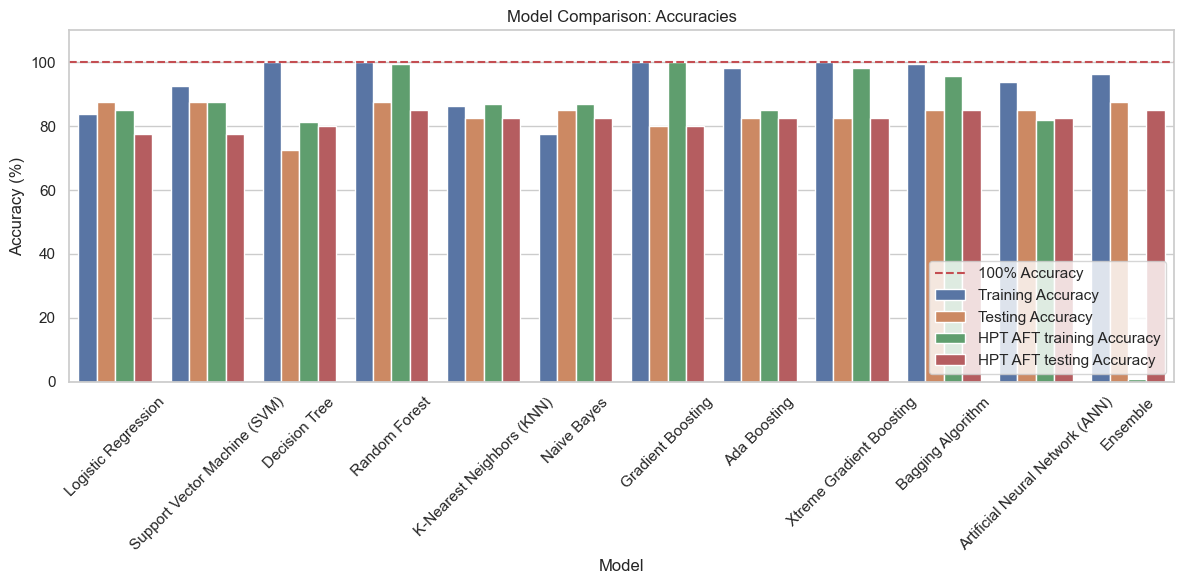

In [265]:
df = pd.DataFrame(Model_performance)

# Set the style
sns.set(style="whitegrid")

# Melt the dataframe for better visualization
df_melted = df.melt(id_vars='Model', 
                     value_vars=['Training Accuracy', 'Testing Accuracy', 
                                 'HPT AFT training Accuracy', 'HPT AFT testing Accuracy'],
                     var_name='Metric', 
                     value_name='Accuracy')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='Accuracy', hue='Metric')
plt.title('Model Comparison: Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.ylim(0, 110)  # Set limits for better visibility
plt.axhline(y=100, color='r', linestyle='--', label='100% Accuracy')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

#### **Final Conclusion**
* The comparison of various machine learning models reveals significant insights into their performance across different accuracy metrics. The Random Forest and Gradient Boosting models stand out with consistently high training and testing accuracies, indicating their robustness and reliability for the given task. In contrast, the Decision Tree model, while achieving perfect training accuracy, shows a concerning drop in testing accuracy, highlighting the risk of overfitting.

* The Support Vector Machine (SVM) and Ensemble methods also demonstrate strong performance, making them viable choices for deployment. Notably, the HPT (Hyperparameter Tuning) results suggest that models like Random Forest and SVM benefit from careful tuning, leading to improved testing accuracies. However, the HPT AFT (After Fine Tuning) results for some models, such as the ANN, indicate potential issues that need further exploration.
* **Support Vector Machine (SVM)** has a high training accuracy (92.5%) and maintains a good testing accuracy (87.5%), indicating it generalizes well without significant overfitting.

* **Logistic Regression** also demonstrates strong performance with training accuracy of 83.75% and testing accuracy of 87.5%, showing it generalizes effectively.

#### **Challenges**
* **Data Complexity:** The dataset consists of multiple variables, each contributing differently to the prediction of heart disease. This complexity can hinder straightforward analysis and interpretation.

* **Imbalanced Classes:** The presence of heart disease (1) versus the absence (0) may not be balanced, leading to challenges in training predictive models effectively.

* **Missing or Incomplete Data:** The dataset may have missing values or inconsistencies, which can affect model performance and reliability.

#### **Challenges Faced**
* **Overfitting:** Some models, particularly the Decision Tree, exhibited high training accuracy but significantly lower testing accuracy, suggesting they memorized the training data instead of generalizing well to unseen data.

Model Complexity:** The complexity of tuning hyperparameters effectively was a challenge. While some models performed well, ensuring they maintained performance after tuning required extensive experimentation.

* **Data Quality and Preprocessing:** Inadequate data cleaning and preprocessing could affect model performance. Ensuring that data is properly prepared is essential for achieving reliable results.

* **Evaluation Metrics:** Choosing the right evaluation metrics was crucial. Different models exhibited varied performance based on the metrics used, which necessitated a thorough understanding of model behavior.

#### **Deployment Considerations**
* **Model Selection:** The final model for deployment should balance performance and complexity. Random Forest and Gradient Boosting appear to be strong candidates due to their accuracy and robustness, but simpler models like Logistic Regression could be considered for scenarios where interpretability and speed are paramount.

* **Scalability:** Deployment should consider the scalability of the selected model, especially in real-time applications. Ensuring that the model can handle increased data loads without significant degradation in performance is vital.

* **Monitoring and Maintenance:** After deployment, continuous monitoring of the model’s performance is necessary to detect any drifts in accuracy due to changes in incoming data patterns. This includes periodic retraining and updating of the model.

* **User Feedback:** Incorporating user feedback into the deployment process can help identify real-world performance issues and areas for improvement.

* **Resource Allocation:** The deployment environment should have adequate resources to support the chosen model, considering both computational and memory requirements to ensure smooth operation.

## Final Model Save

* **Here we save the final model for future use**

In [269]:
import pickle # use for save the model

In [270]:
with open("Heart Diesease.pkl","wb") as f:  # save model
    pickle.dump(SVM_model,f) # save SVM model

In [271]:
with open("Heart Diesease.pkl","rb") as f: # load the model
    Model_new = pickle.load(f) # save as Mdel_new the file for prediction

In [272]:
X_array = np.array(X) # for easy to prediction we save the X in array form

In [273]:
X_array[0] # see the first row of X

array([ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
       -0.11743196,  1.36230498, -0.98568965, -1.05396422,  0.93248505])

In [274]:
Model_new.predict([[0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
       -0.11743196,  1.36230498, -0.98568965, -1.05396422,  0.93248505]])

array([0], dtype=int64)

In [275]:
y.head(1) # see the first output

0    0
Name: heart_disease_present, dtype: int64

# Thank You......